<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/Clustering_%26_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [47]:
import zipfile
import numpy as np
import pandas as pd
import spacy
import string

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [8]:
!pip install kaggle

In [107]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d hsankesara/medium-articles

100% 1.32G/1.33G [00:16<00:00, 137MB/s]
100% 1.33G/1.33G [00:17<00:00, 83.8MB/s]


In [10]:
zip_ref = zipfile.ZipFile("/content/medium-articles.zip", 'r')
zip_ref.extractall("/content/")
zip_ref.close()

In [11]:
df = pd.read_csv('/content/articles.csv')

In [12]:
df.sample(5)

,author,claps,reading_time,link,title,text
210,Bargava,11.8K,3,https://towardsdatascience.com/how-to-learn-de...,How to learn Deep Learning in 6 months – Towar...,"It is quite possible to learn, follow and cont..."
317,Waleed Abdulla,507,12,https://medium.com/@waleedka/traffic-sign-reco...,Traffic Sign Recognition with TensorFlow – Wal...,This is part 1 of a series about building a de...
67,David Venturi,10.6K,20,https://medium.freecodecamp.org/every-single-m...,Every single Machine Learning course on the in...,"A year and a half ago, I dropped out of one of..."
230,Berit Anderson,1.6K,20,https://medium.com/join-scout/the-rise-of-the-...,The Rise of the Weaponized AI Propaganda Machi...,By Berit Anderson and Brett Horvath\nThis piec...
259,Dhruv Parthasarathy,4.3K,12,https://blog.athelas.com/a-brief-history-of-cn...,A Brief History of CNNs in Image Segmentation:...,"At Athelas, we use Convolutional Neural Networ..."


In [13]:
df.shape

(337, 6)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        337 non-null    object
 1   claps         337 non-null    object
 2   reading_time  337 non-null    int64 
 3   link          337 non-null    object
 4   title         337 non-null    object
 5   text          337 non-null    object
dtypes: int64(1), object(5)
memory usage: 15.9+ KB


In [15]:
punctuations = list(string.punctuation.replace('.',""))

In [16]:
nlp = spacy.load('en_core_web_md')

In [17]:
def text_processing(text):
  # Normalize text
  text = text.lower()

  # Remove Punctuations
  text = ''.join([char for char in text if char not in punctuations])

  # Lemmatisation
  doc = nlp(text)
  text = ' '.join([token.lemma_ for token in doc])

  return text

In [18]:
df['processed_text'] = df['text'].apply(text_processing)

In [27]:
tfidf = TfidfVectorizer(max_df=0.95,min_df=0.1,stop_words='english')

In [28]:
transformed_data = tfidf.fit_transform(df['processed_text'])

In [30]:
transformed_data.shape

(337, 959)

In [34]:
# Initialize an empty list to store the sum of squared distances (SSD) results
ssd_results = []

# Generate a list of values for k (number of clusters) ranging from 2 to 249
k_values = list(range(2, 25))

# Initialize an empty list to store silhouette scores
sil = []

# Iterate over each value of k
for k in k_values:
    # Create a KMeans model with k clusters
    model = KMeans(n_clusters=k)

    # Fit the model to the scaled data
    model.fit(transformed_data)

    # Append the sum of squared distances (SSD) to the ssd_results list
    ssd_results.append(model.inertia_)

    # Get the cluster labels for each data point
    labels = model.labels_

    # Calculate the silhouette score for the current clustering
    sil.append(silhouette_score(transformed_data, labels, metric='euclidean'))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

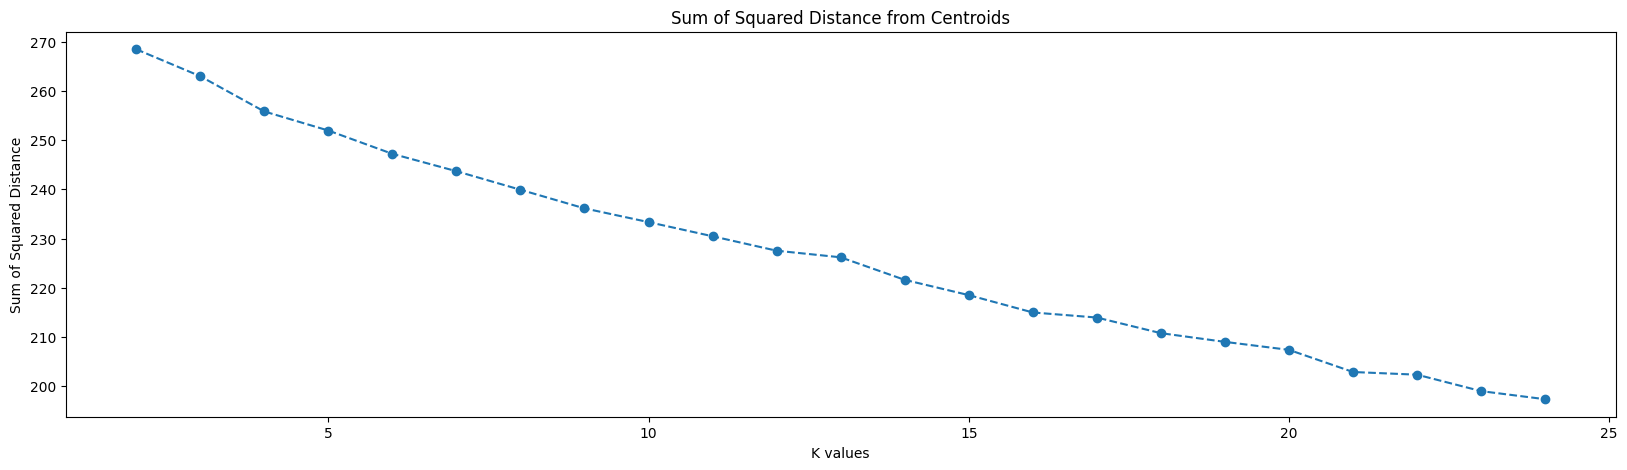

In [35]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 5))

# Set the title of the plot
ax.set_title('Sum of Squared Distance from Centroids')

# Plot the sum of squared distances against the values of k
ax.plot(k_values, ssd_results, 'o--')

# Set the label for the x-axis
ax.set_xlabel('K values')

# Set the label for the y-axis
ax.set_ylabel('Sum of Squared Distance')

# Display the plot
plt.show()


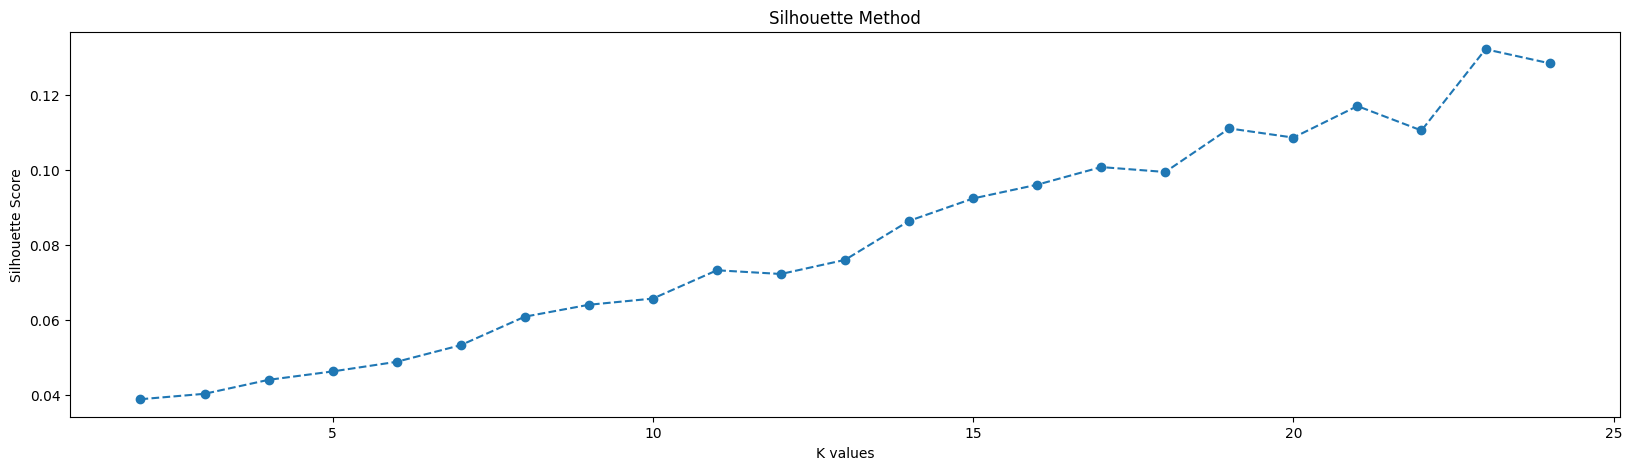

In [36]:
# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(20, 5))

# Set the title of the plot
ax.set_title('Silhouette Method')

# Plot the silhouette scores against the values of k
ax.plot(k_values, sil, 'o--')

# Set the label for the x-axis
ax.set_xlabel('K values')

# Set the label for the y-axis
ax.set_ylabel('Silhouette Score')

# Display the plot
plt.show()


In [37]:
# Create a Pandas Series from the silhouette scores
Sil_Series = pd.Series(sil)

# Assign the values of k as the index of the series
Sil_Series.index = k_values

# Sort the series in descending order based on silhouette scores
Sorted_Sil_Series = Sil_Series.sort_values(ascending=False)

# Select the top 30 silhouette scores
Top_Sil_Values = Sorted_Sil_Series.iloc[:30]


In [42]:
Top_Sil_Values

23    0.132239
24    0.128490
21    0.117086
19    0.111123
22    0.110575
20    0.108681
17    0.100823
18    0.099514
16    0.096122
15    0.092460
14    0.086478
13    0.076083
11    0.073314
12    0.072323
10    0.065770
9     0.064117
8     0.060943
7     0.053348
6     0.048913
5     0.046347
4     0.044108
3     0.040386
2     0.038939
dtype: float64

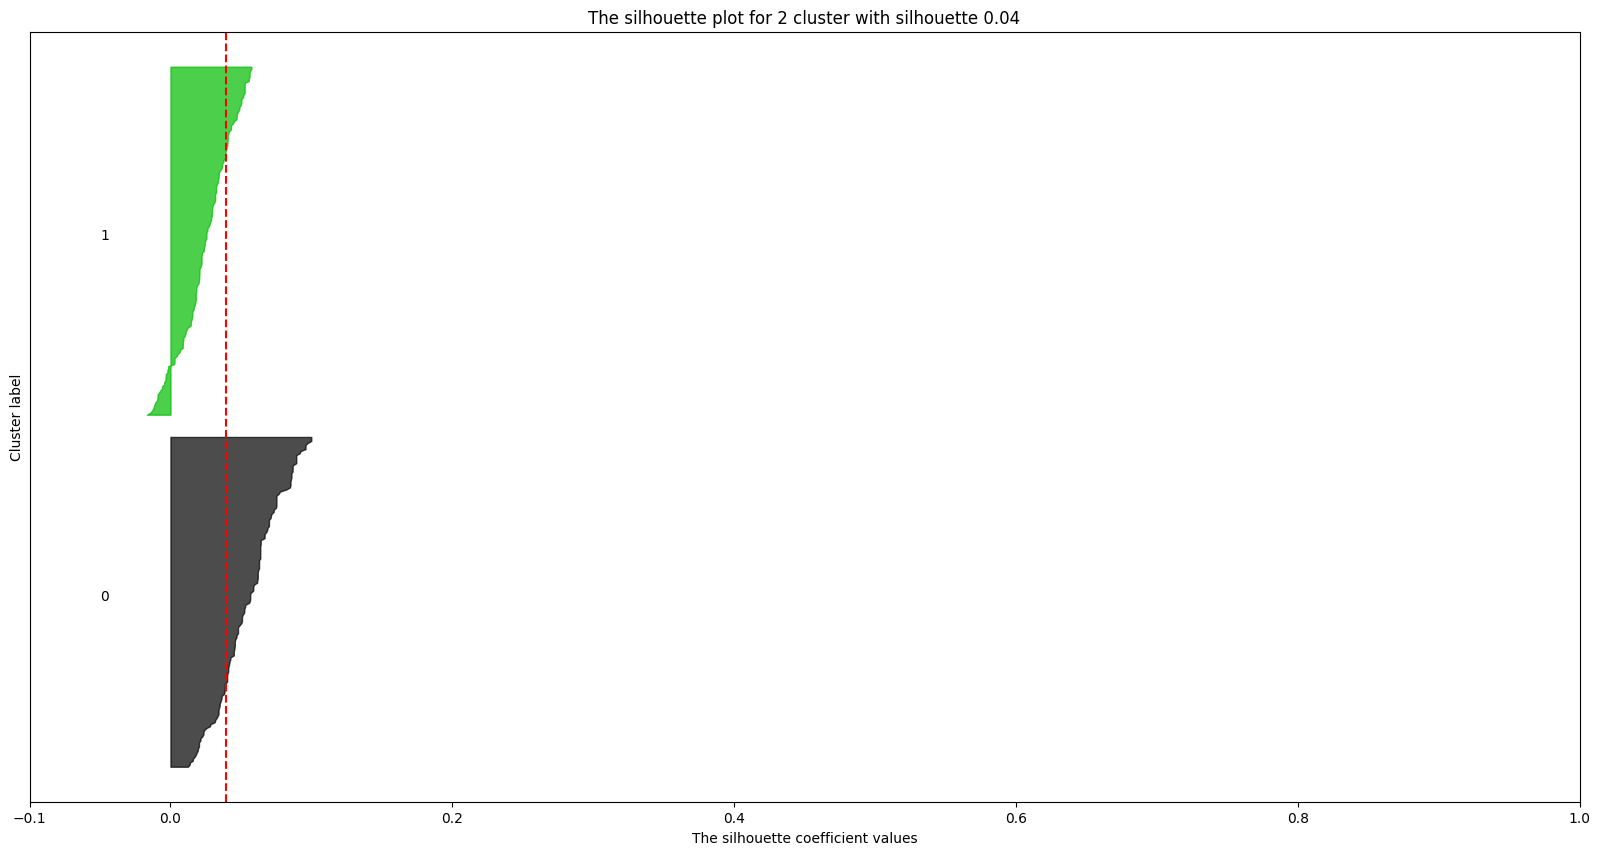

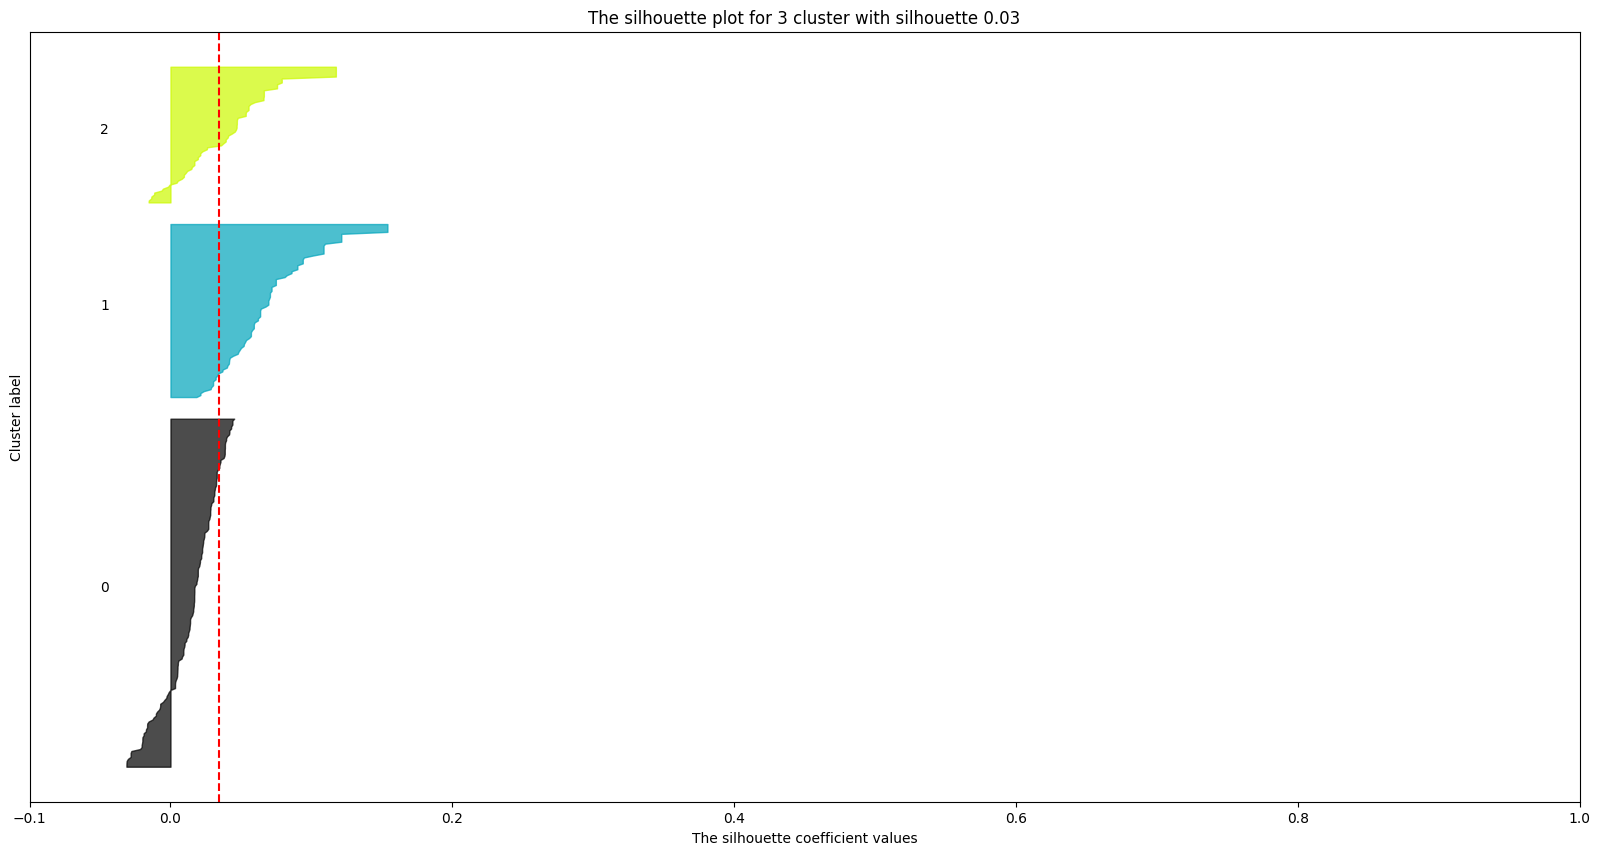

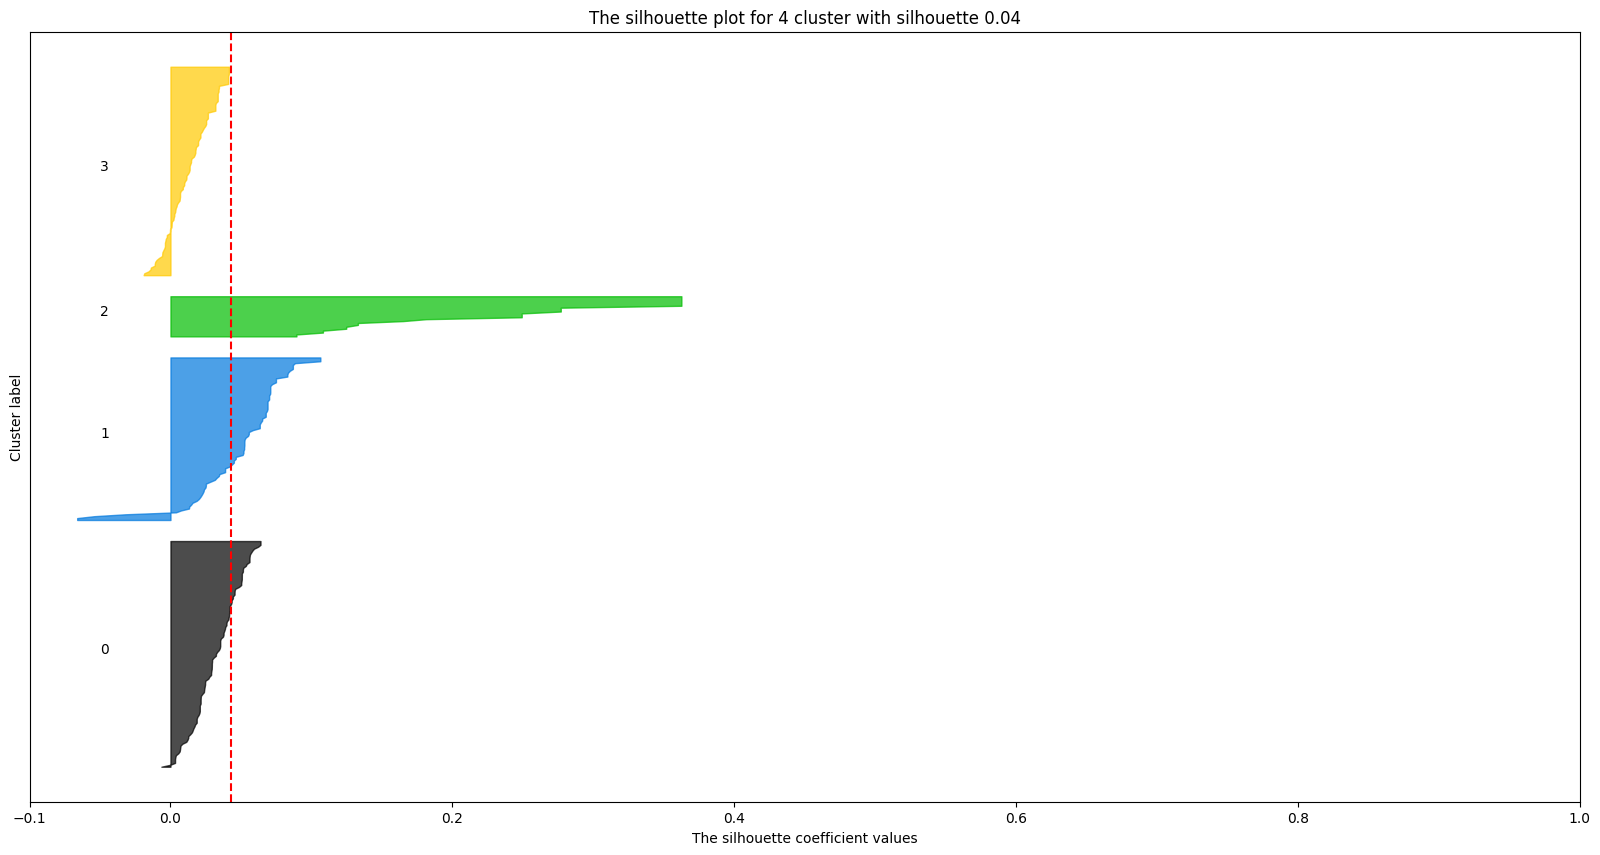

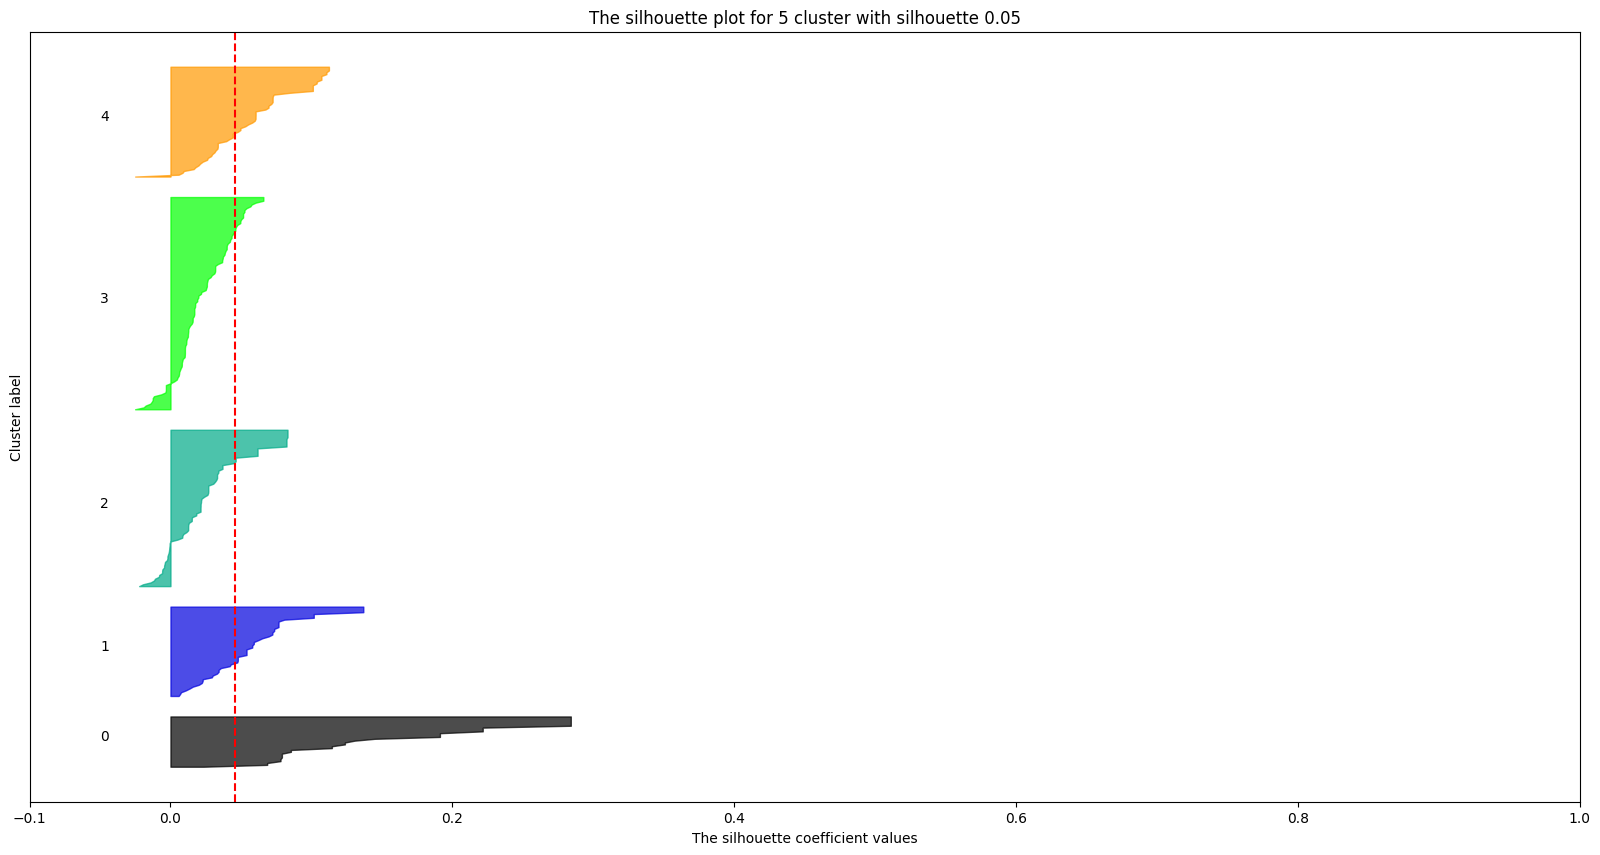

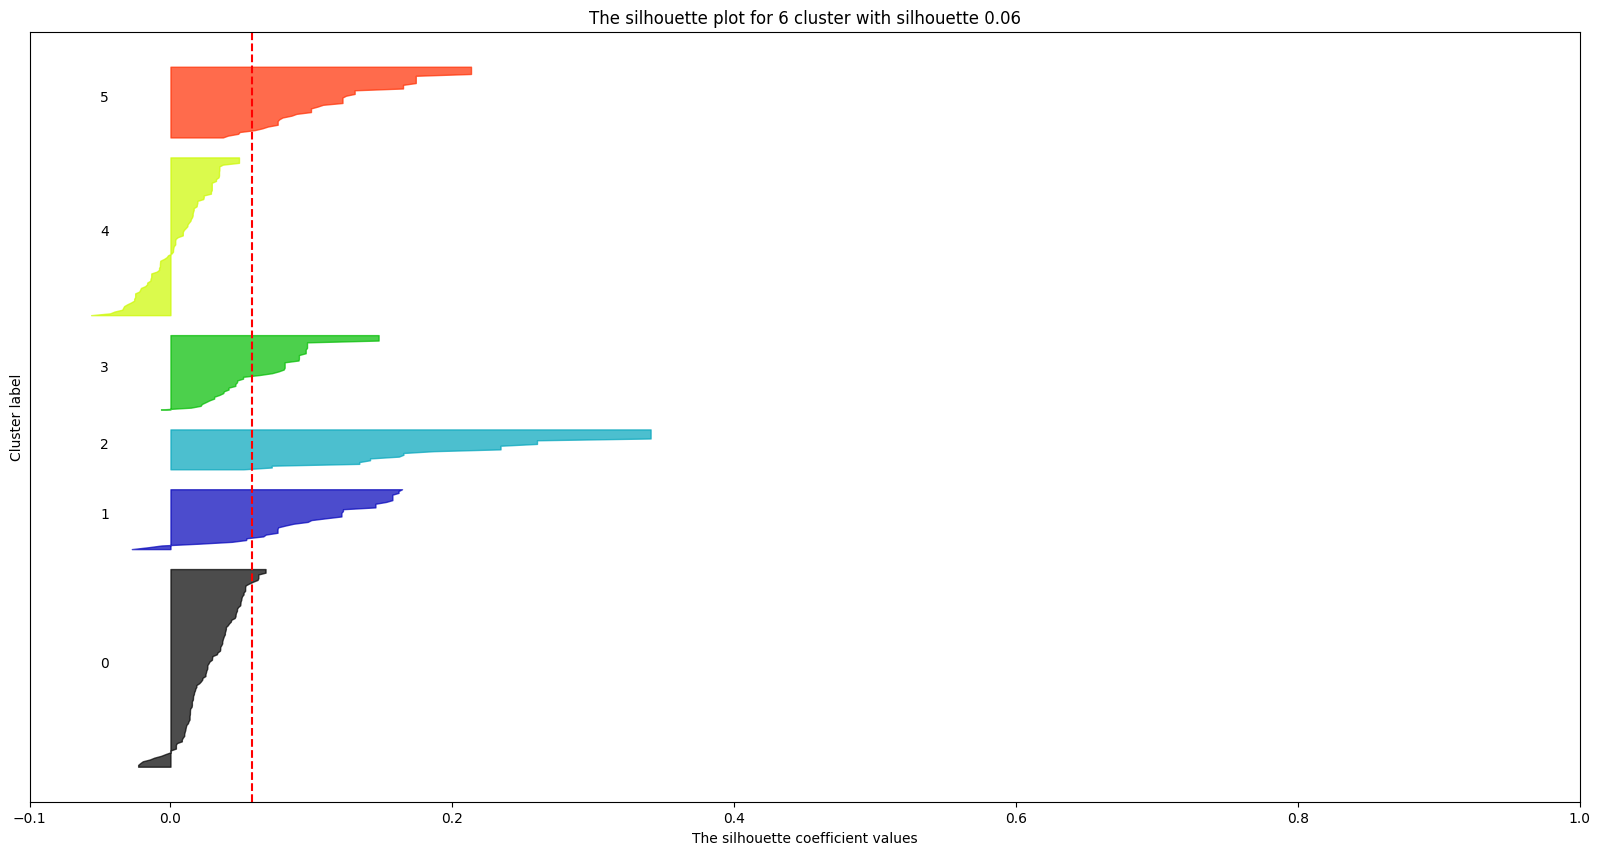

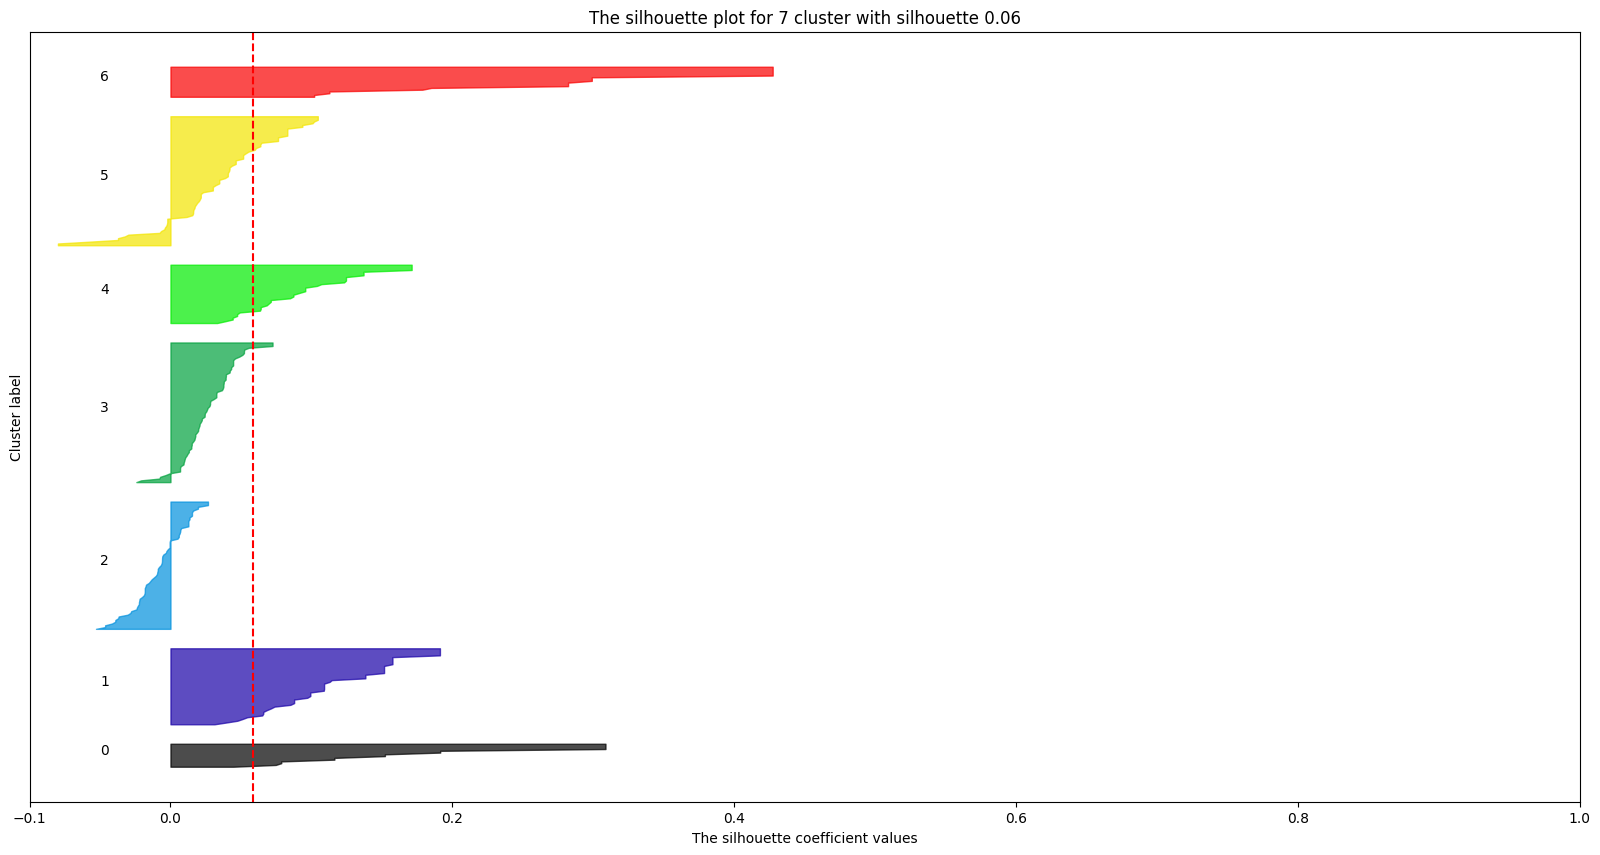

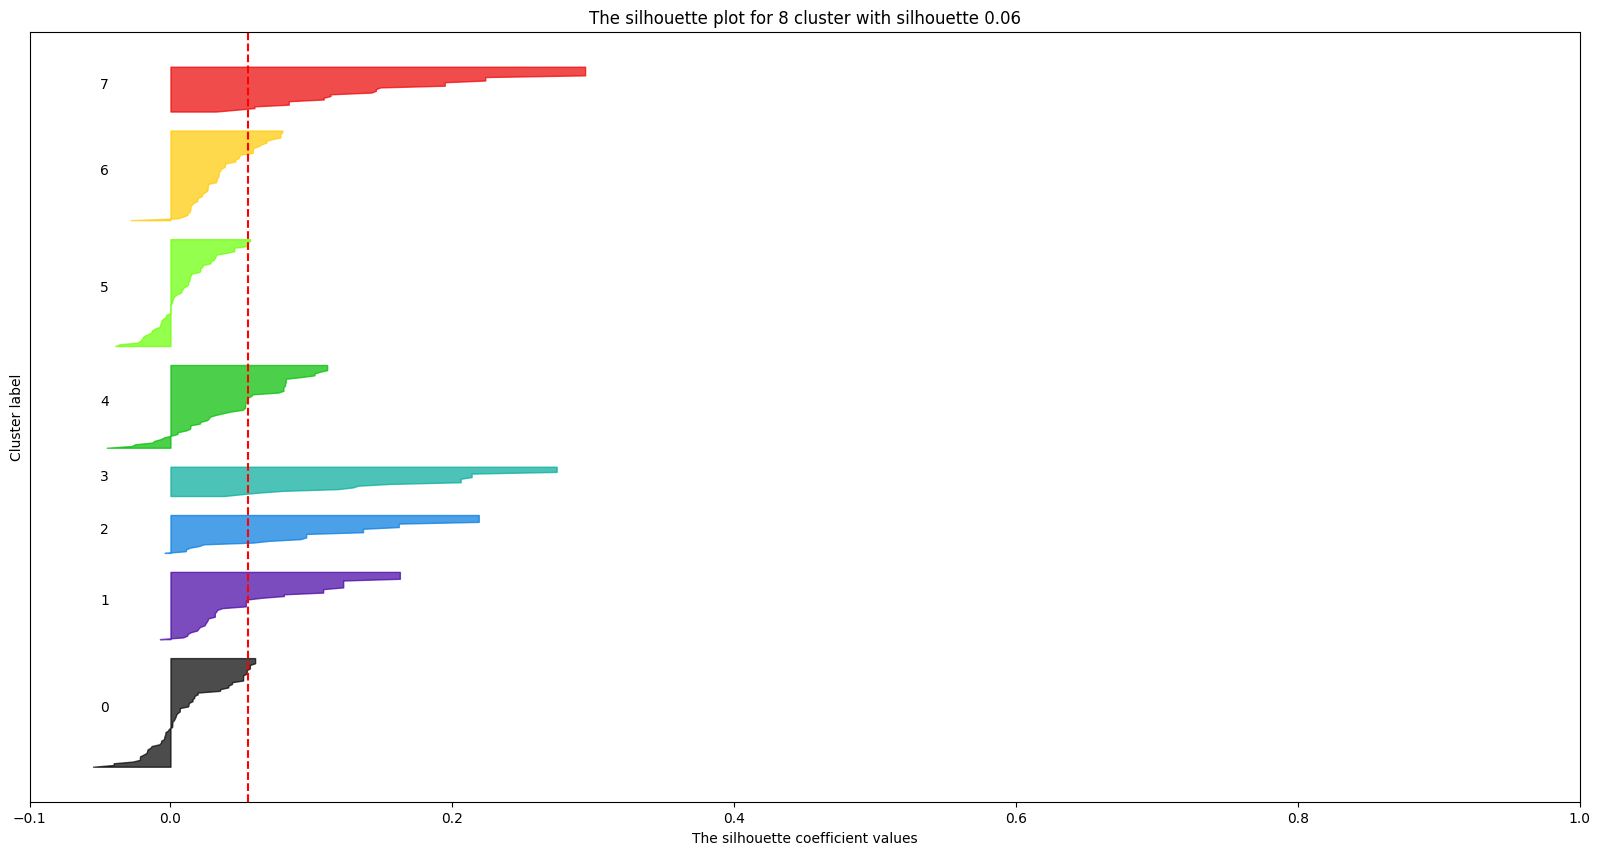

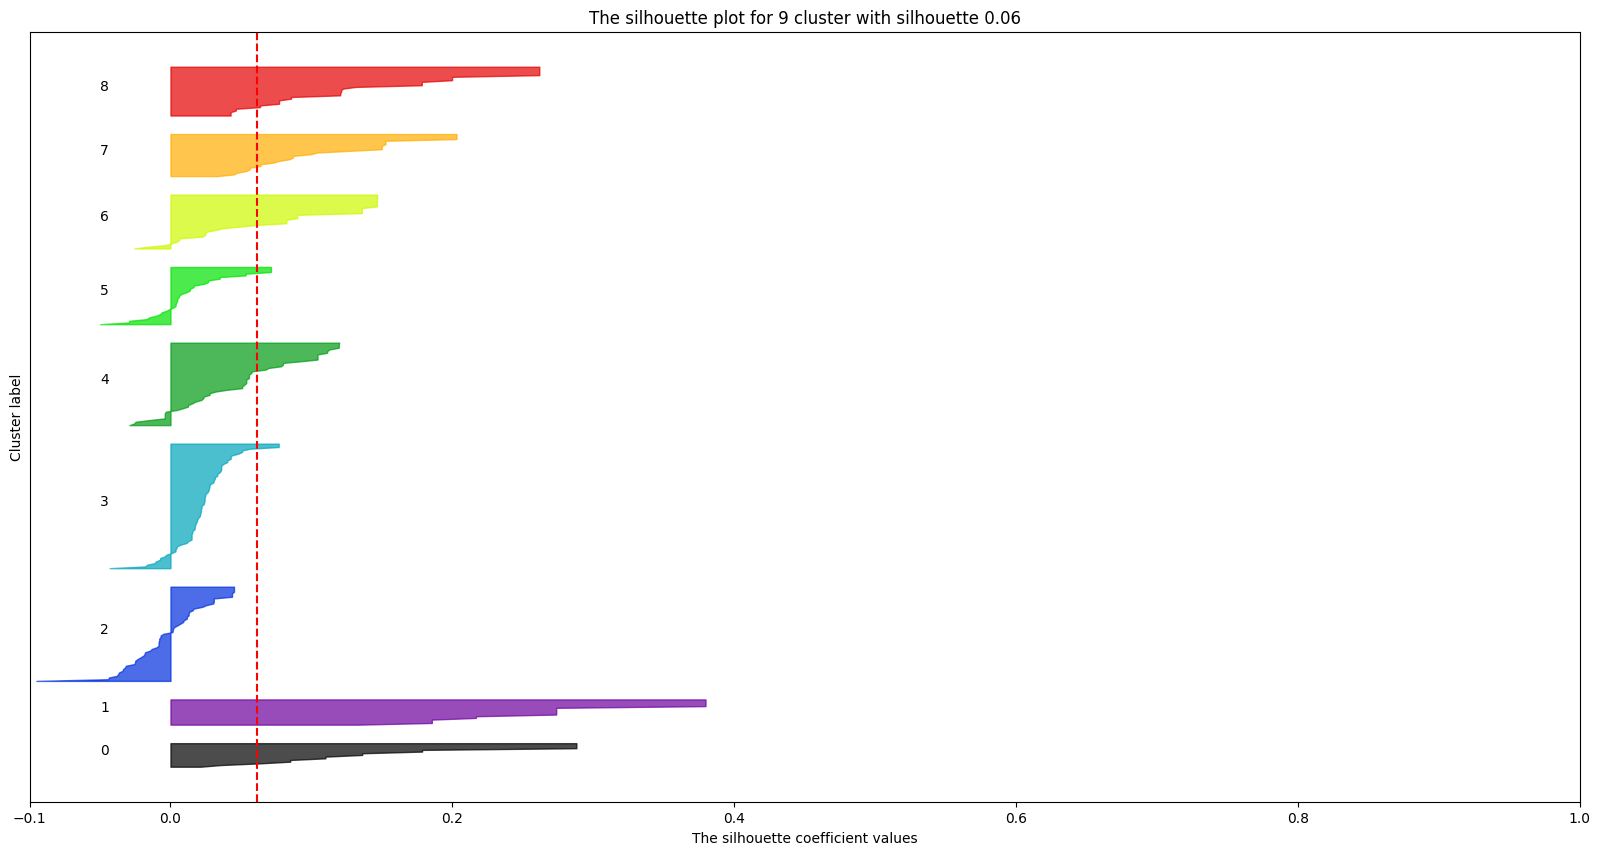

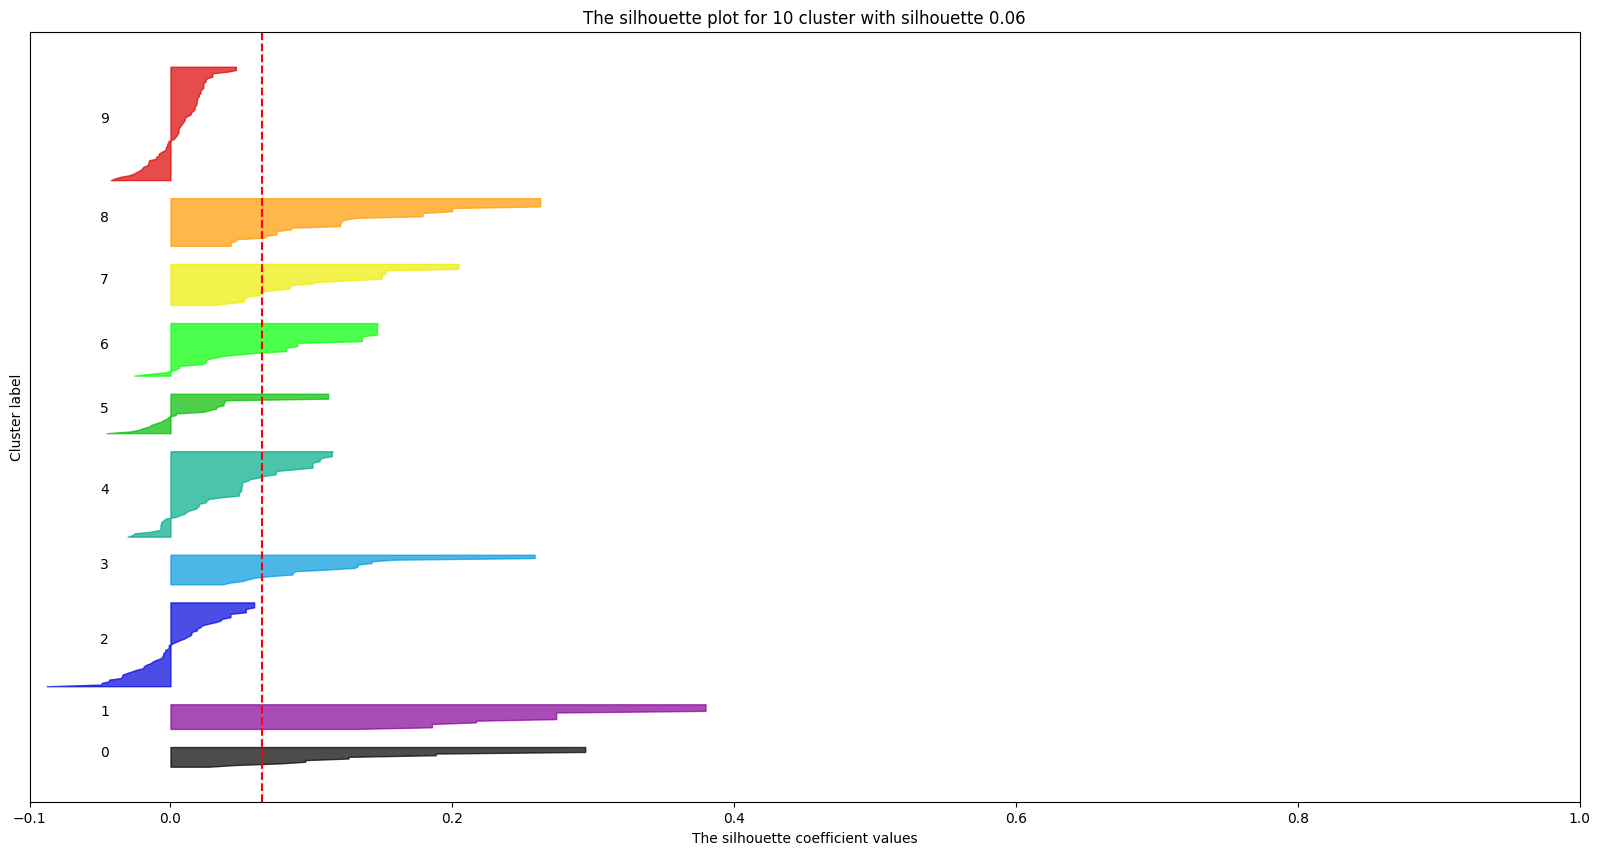

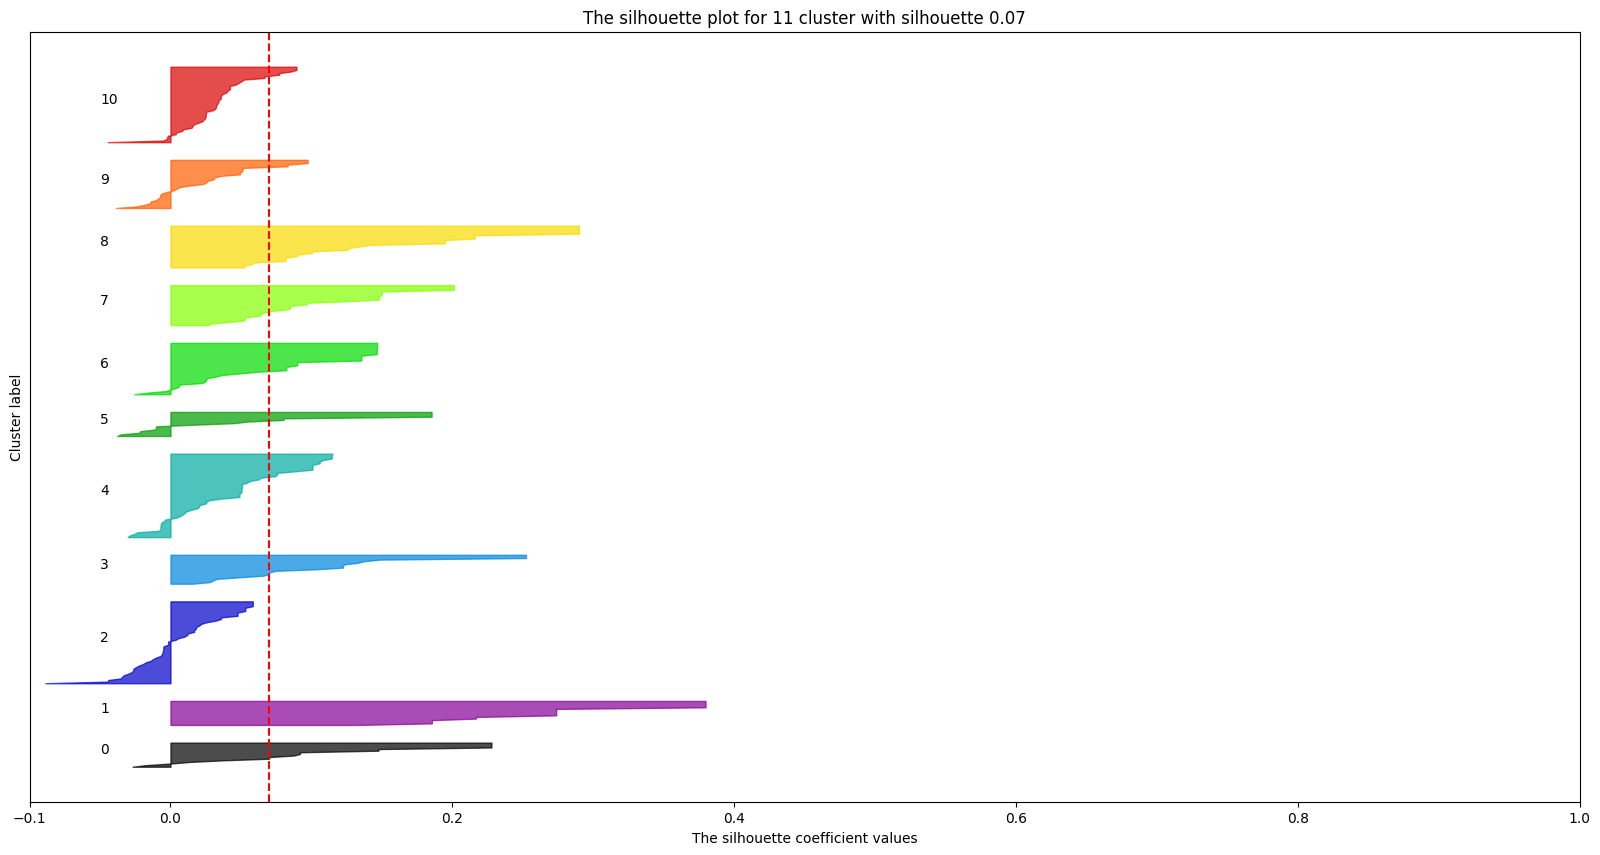

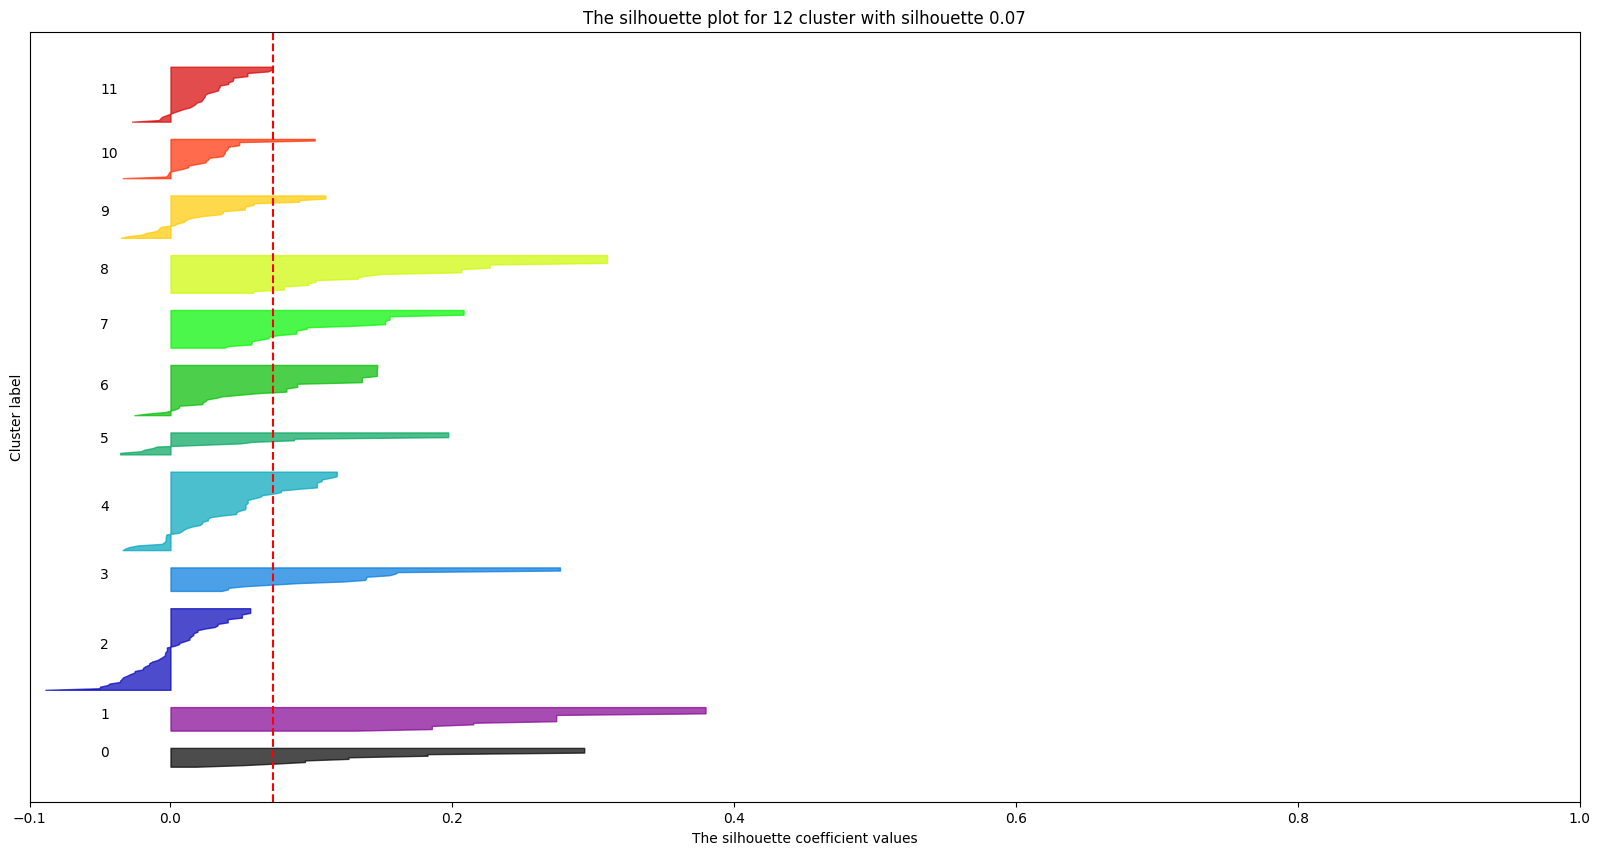

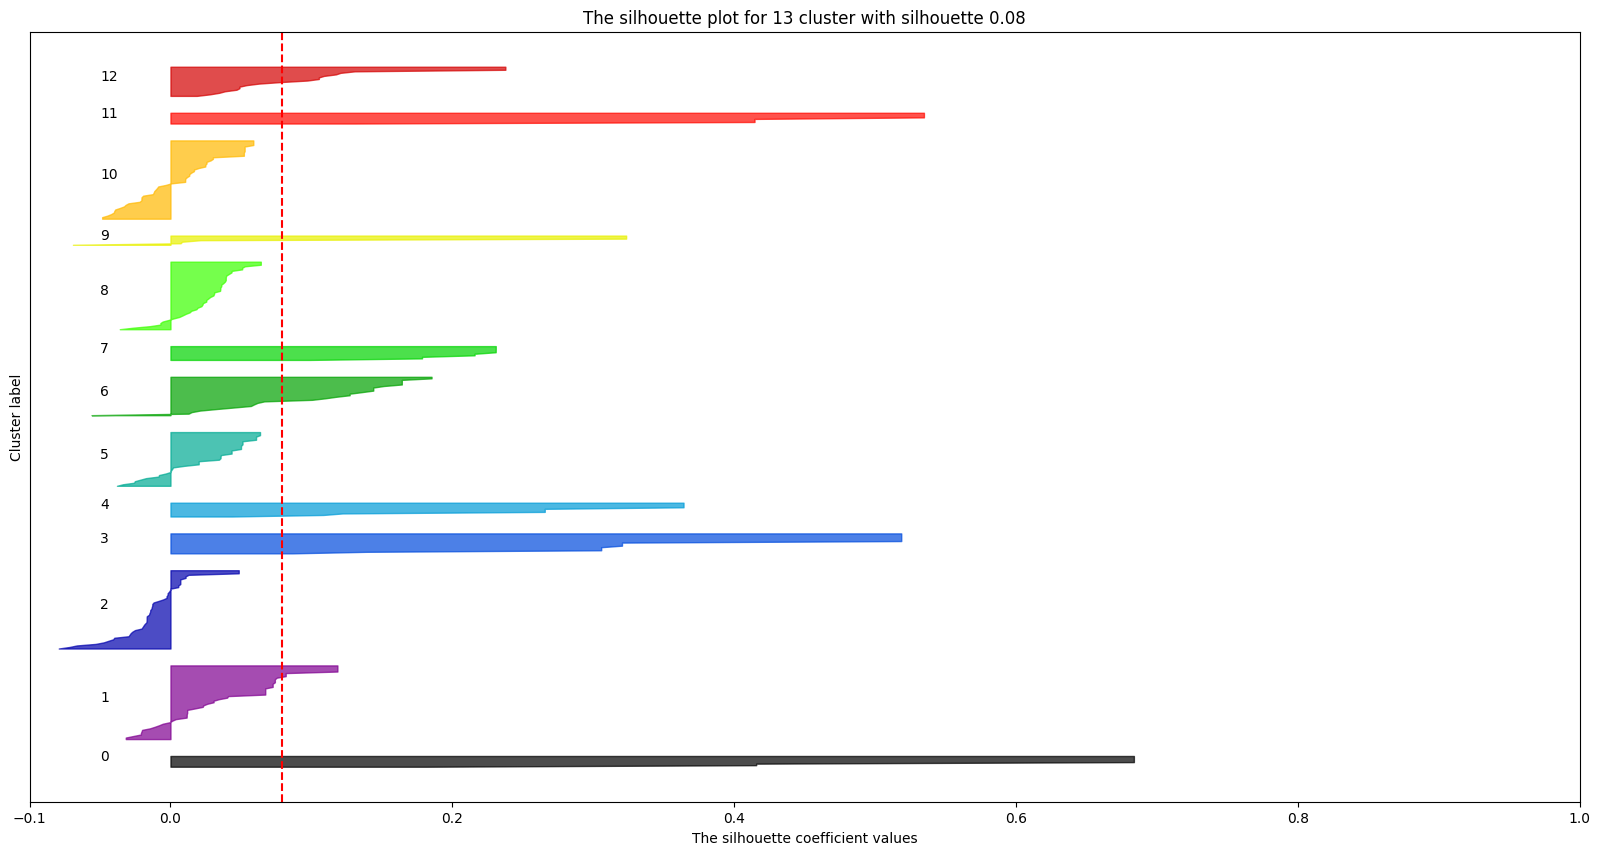

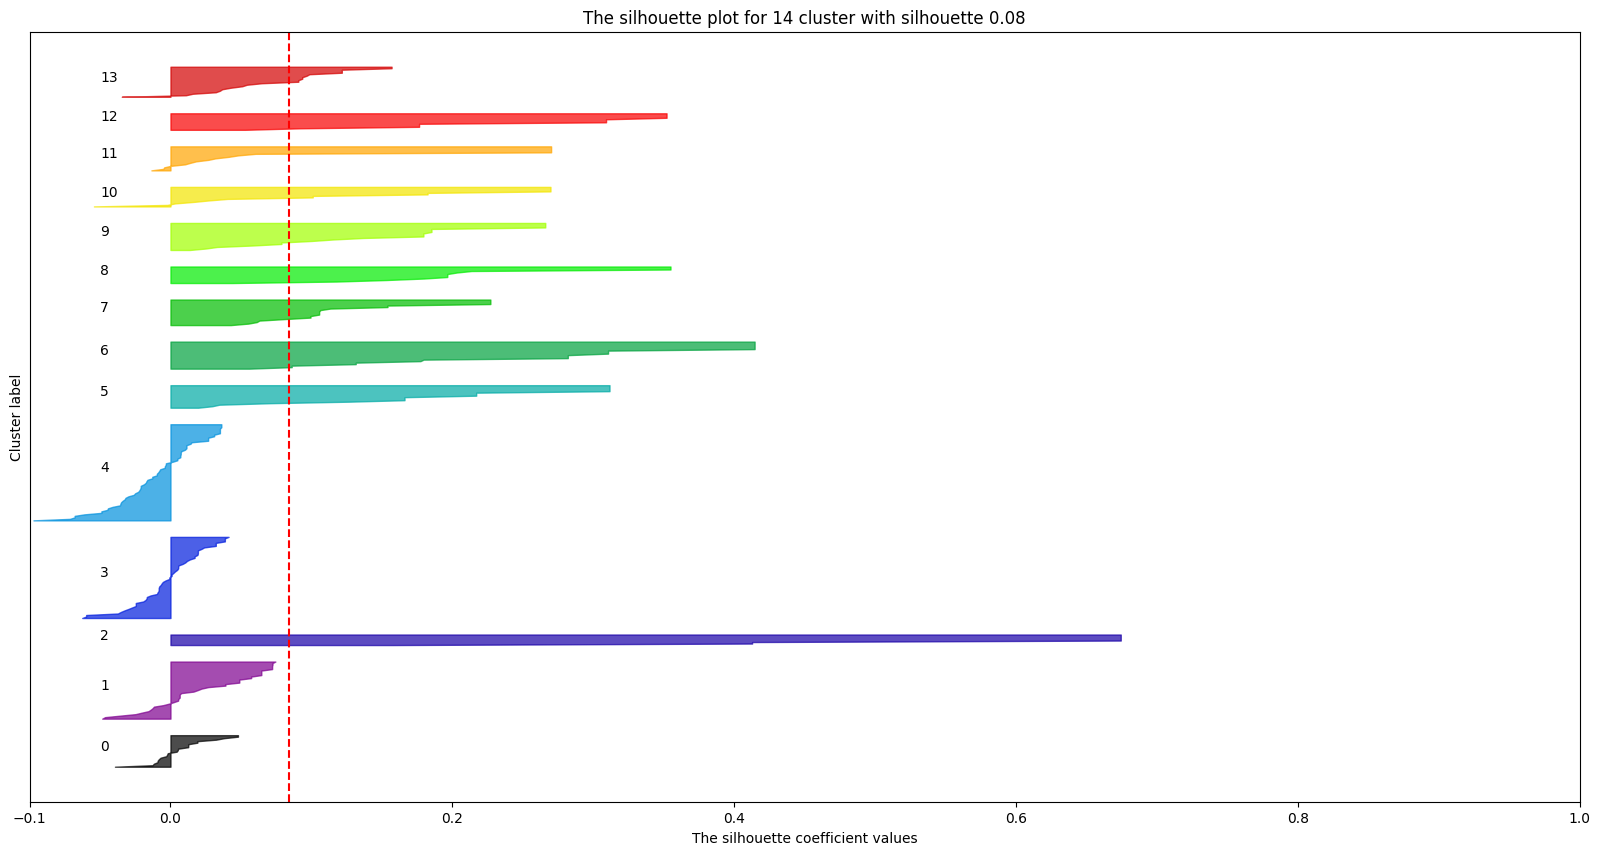

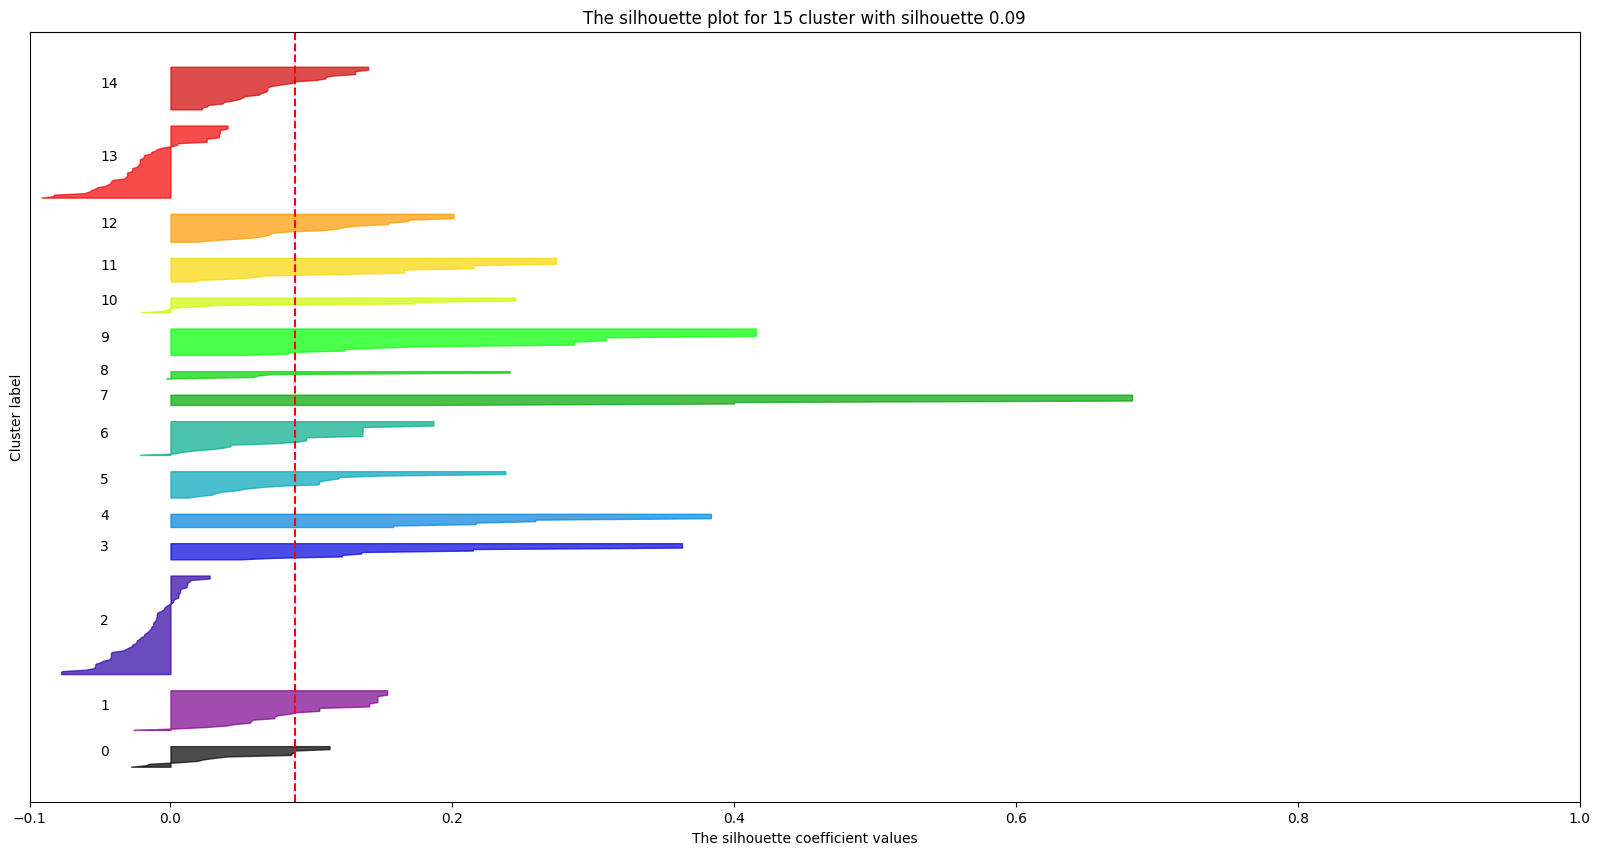

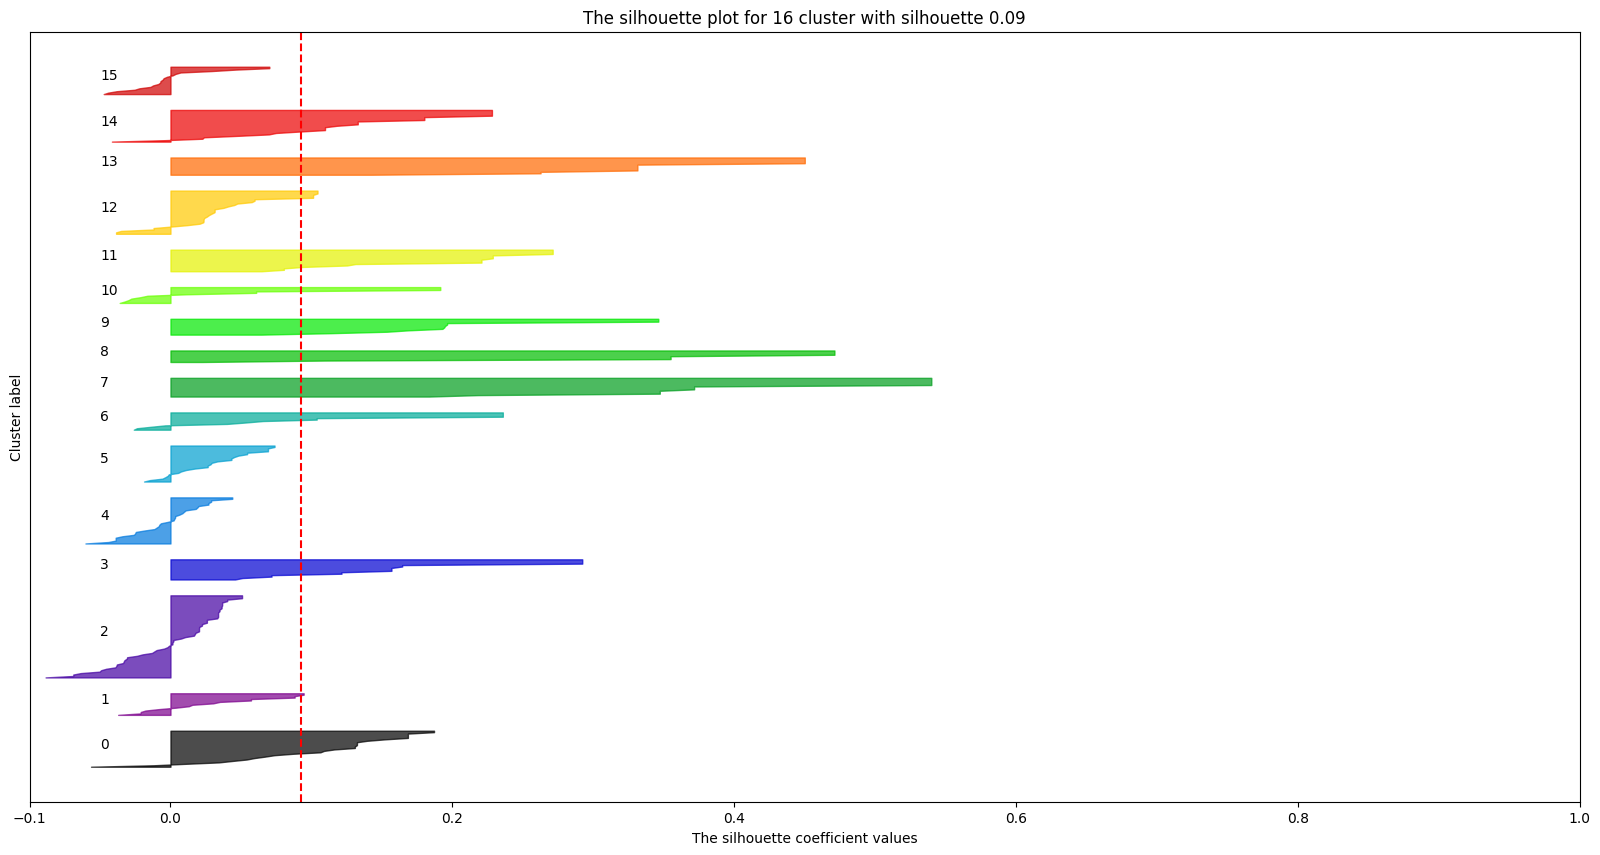

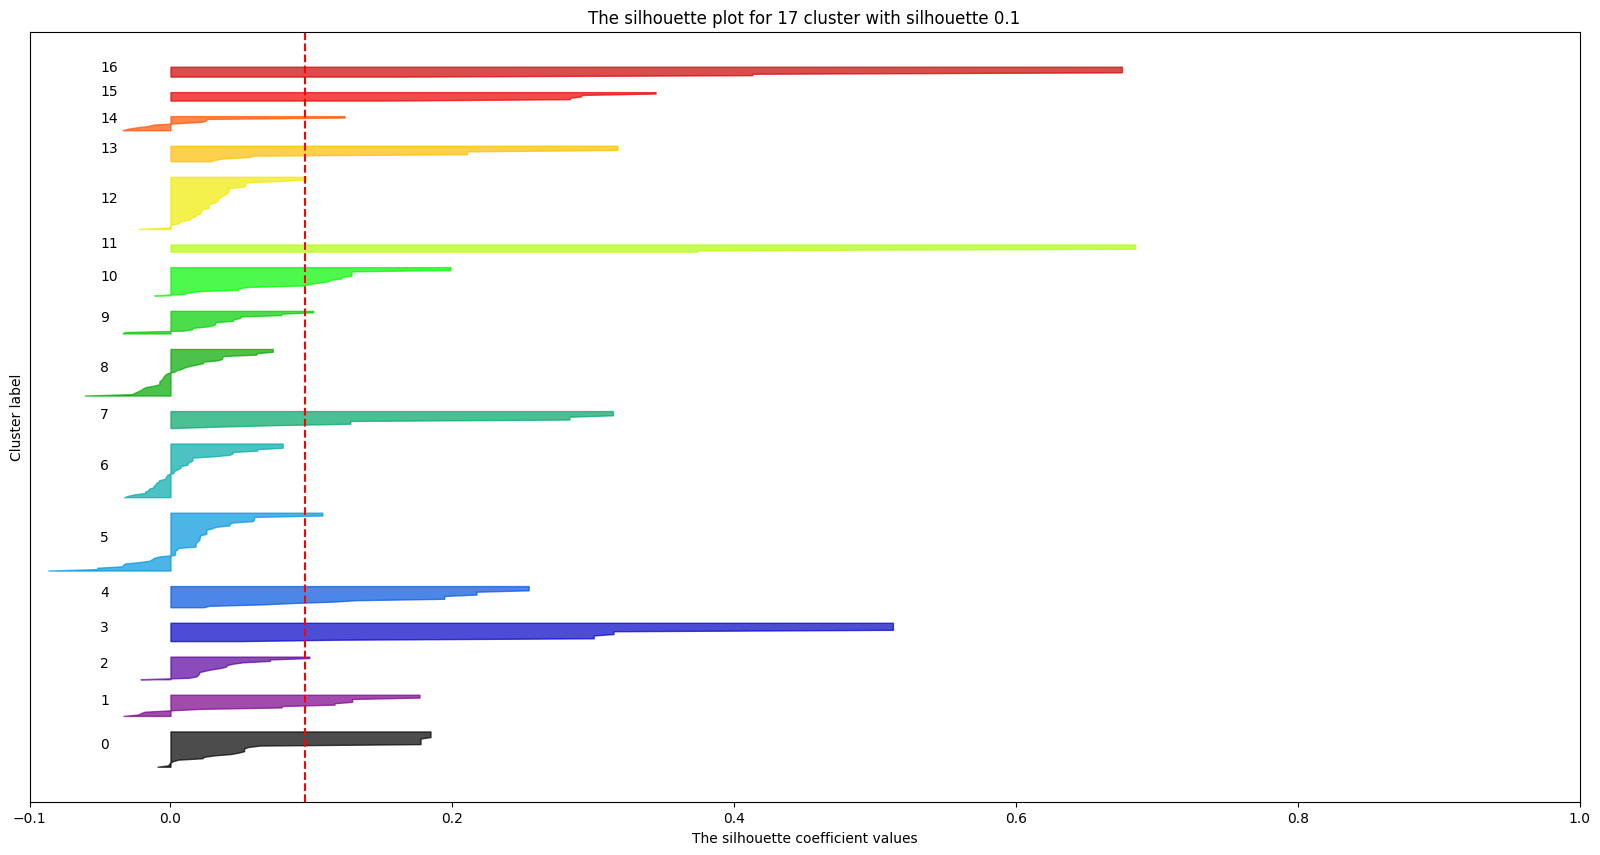

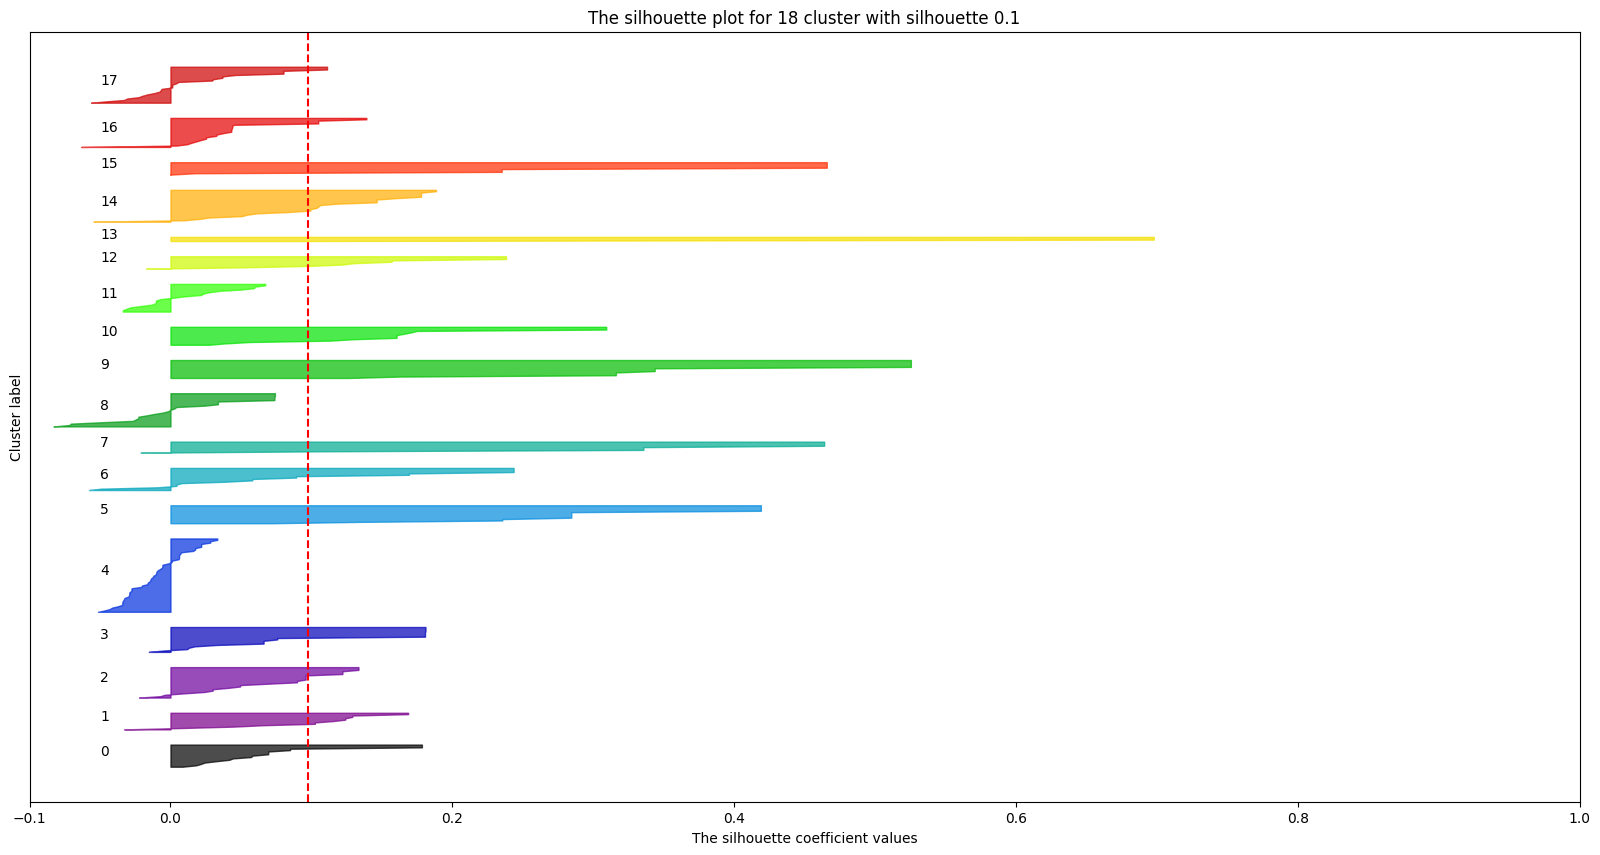

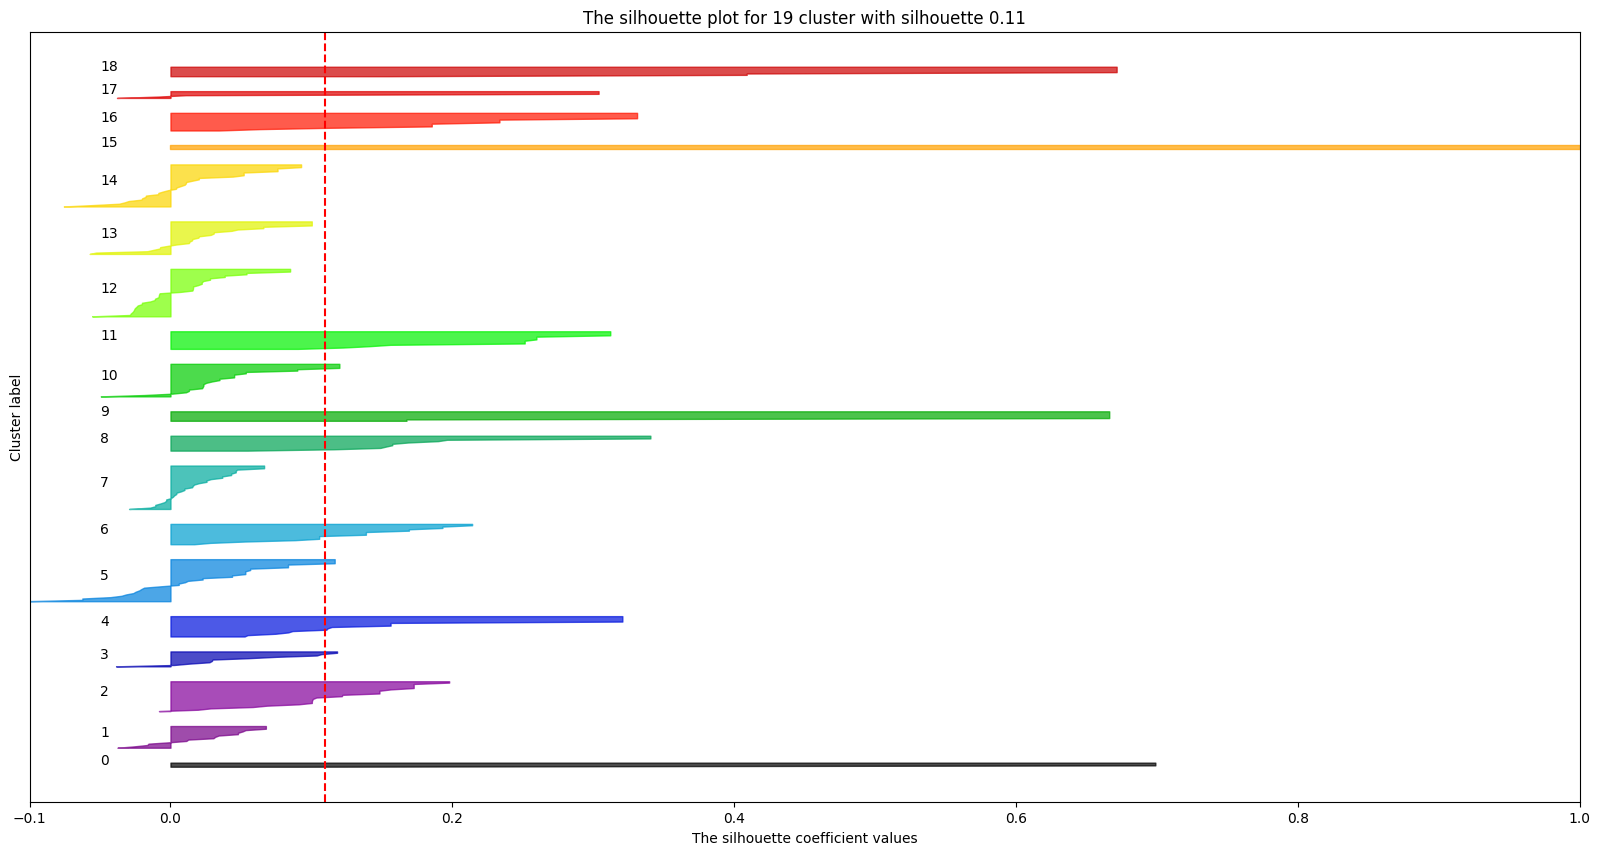

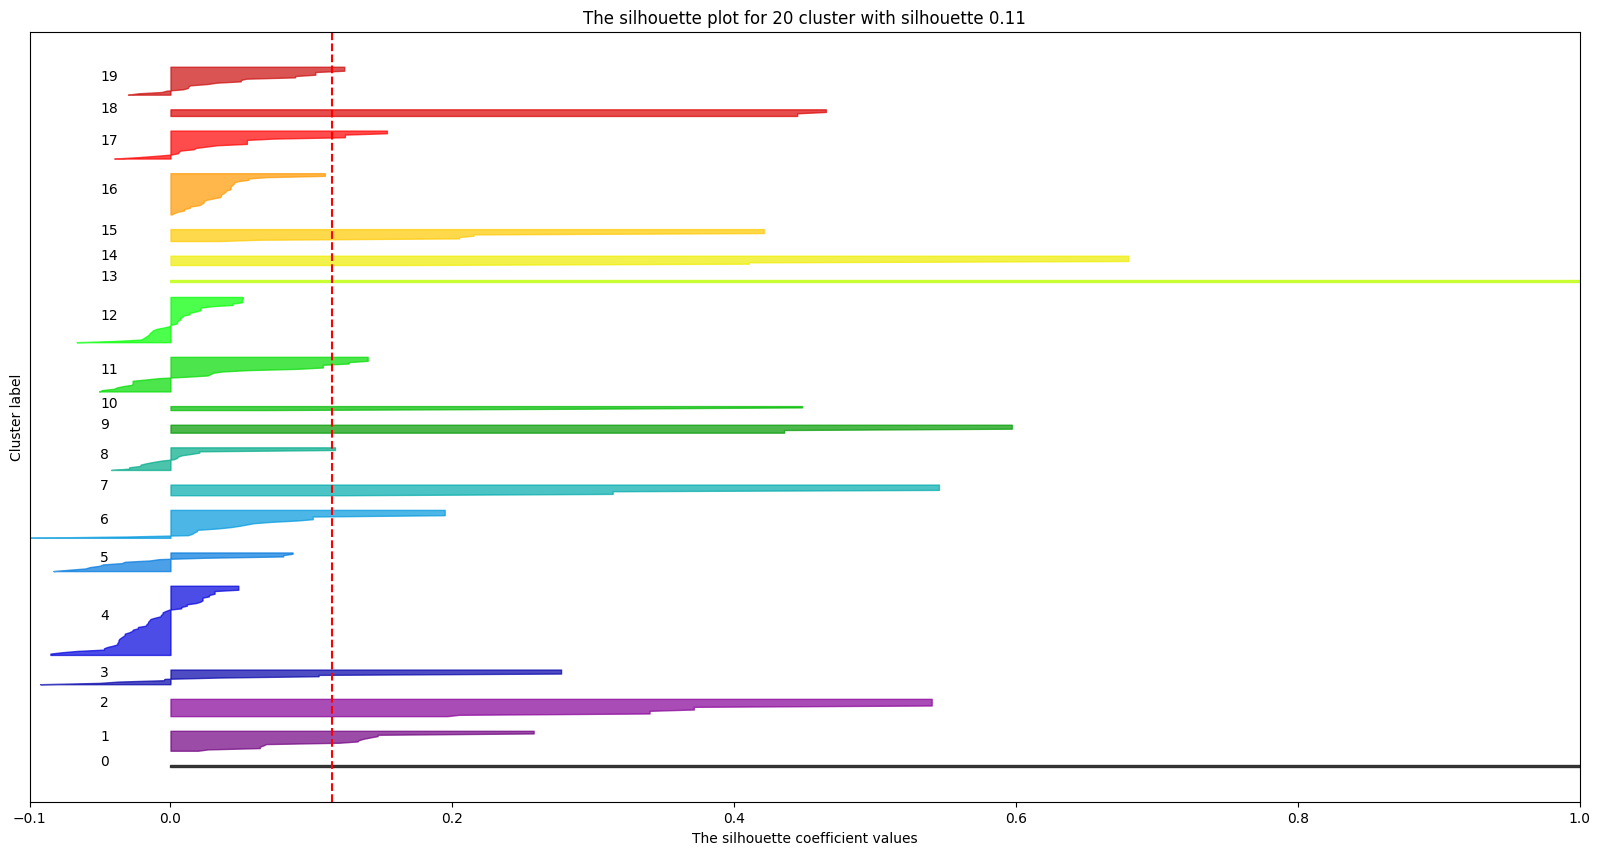

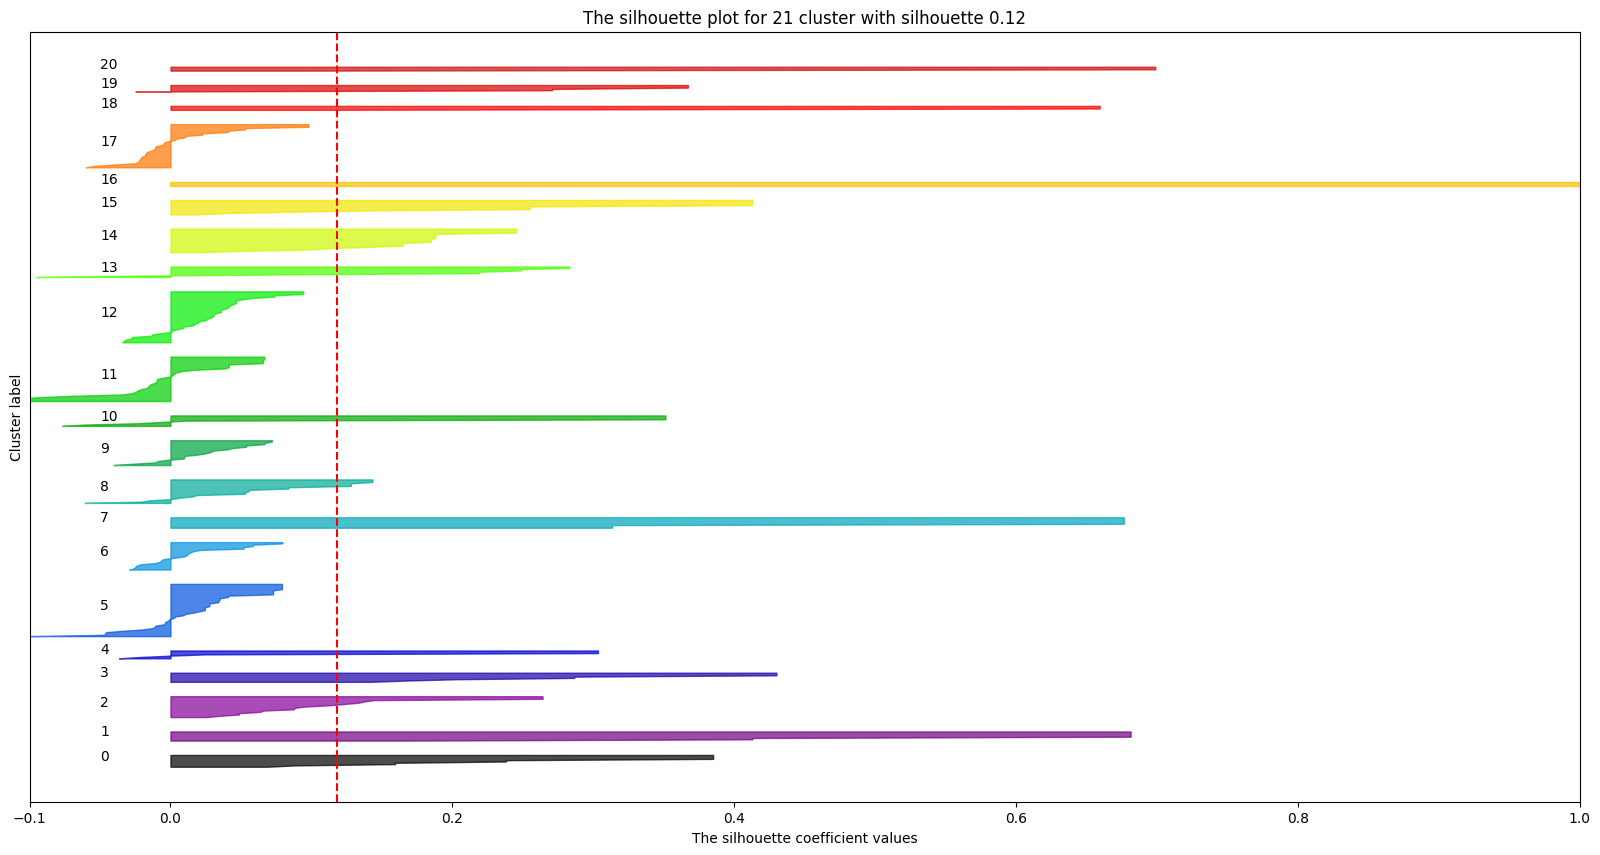

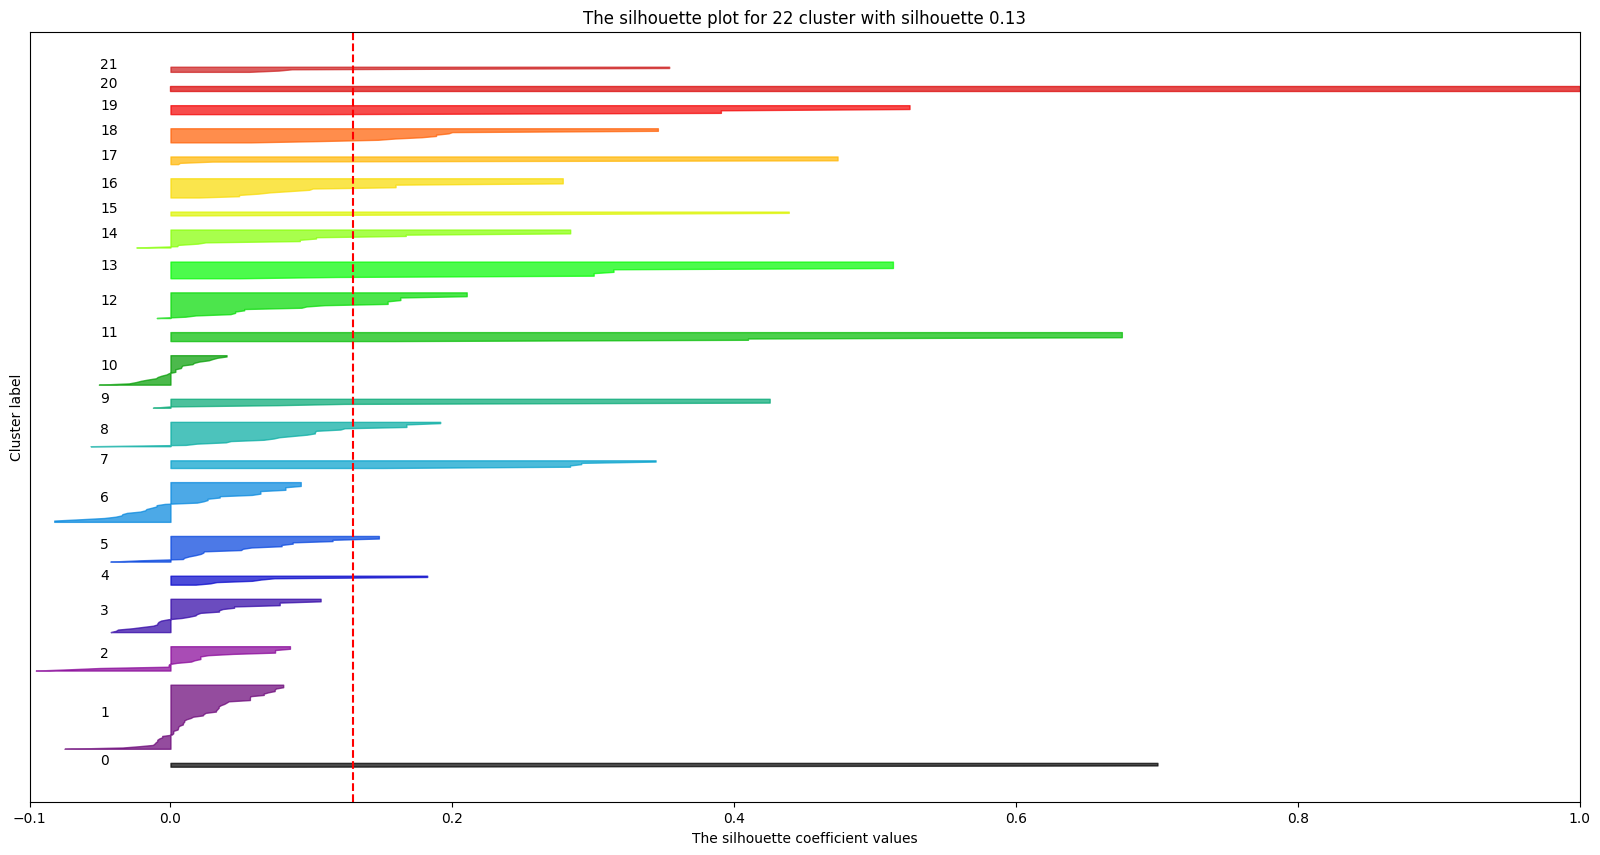

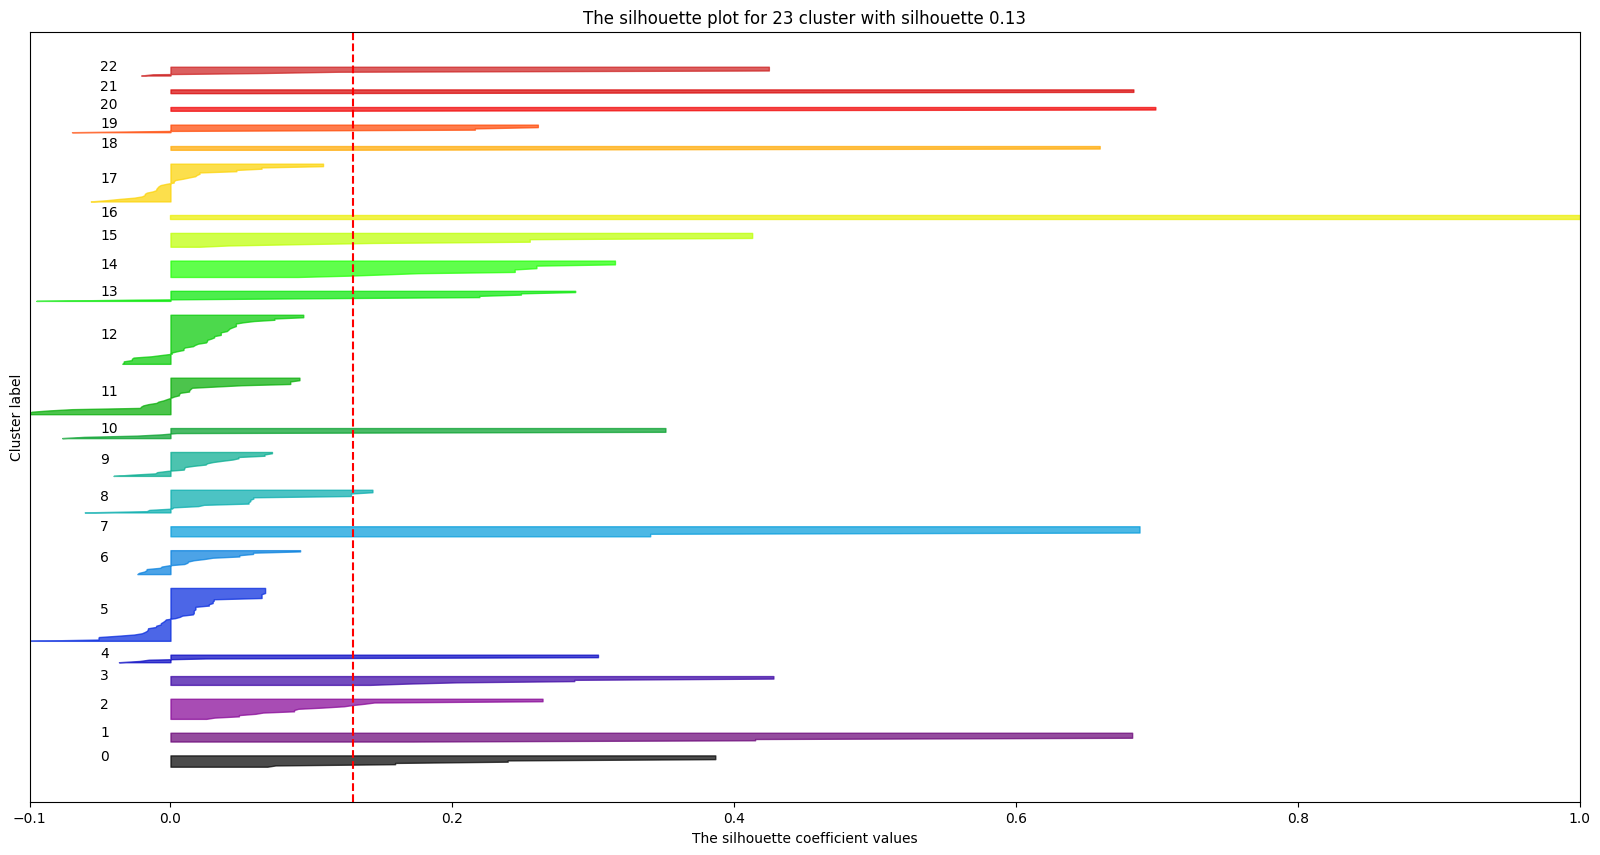

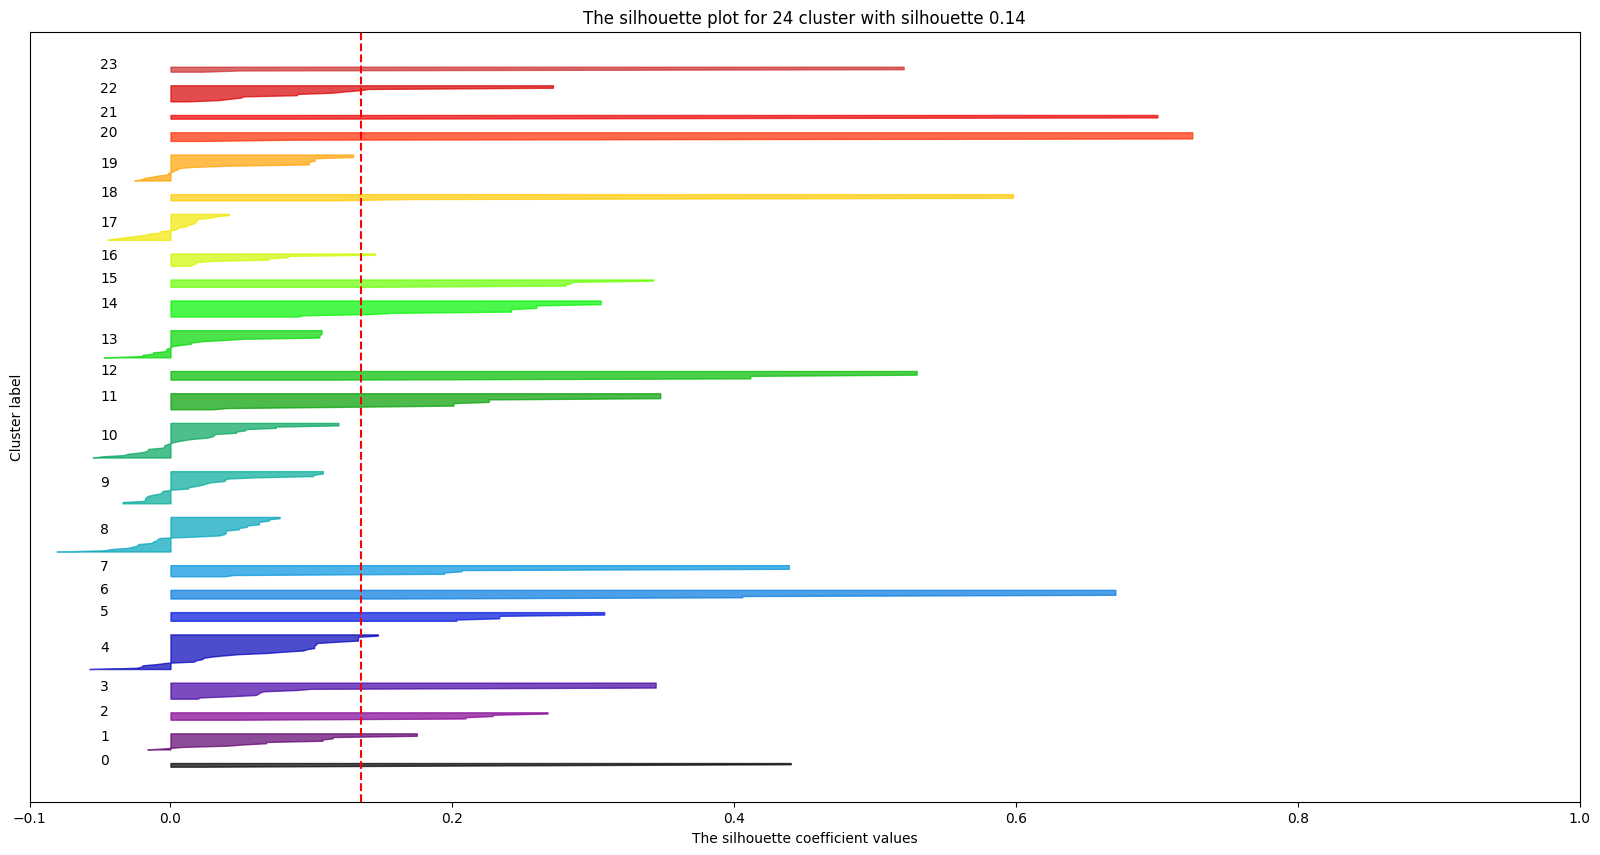

In [53]:
range_n_clusters = k_values

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig,  ax = plt.subplots()
    fig.set_size_inches(20,10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(transformed_data)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(transformed_data, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(transformed_data, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title(f"The silhouette plot for {n_clusters} cluster with silhouette {np.round(silhouette_avg,2)}")
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [54]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(transformed_data)

In [57]:
from sklearn.decomposition import TruncatedSVD

In [61]:
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(transformed_data)

In [62]:
X_reduced.shape

(337, 100)

In [63]:
tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X_reduced)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 337 samples in 0.001s...
[t-SNE] Computed neighbors for 337 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 337 / 337
[t-SNE] Mean sigma: 0.436095
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.604515
[t-SNE] KL divergence after 1000 iterations: 0.081278


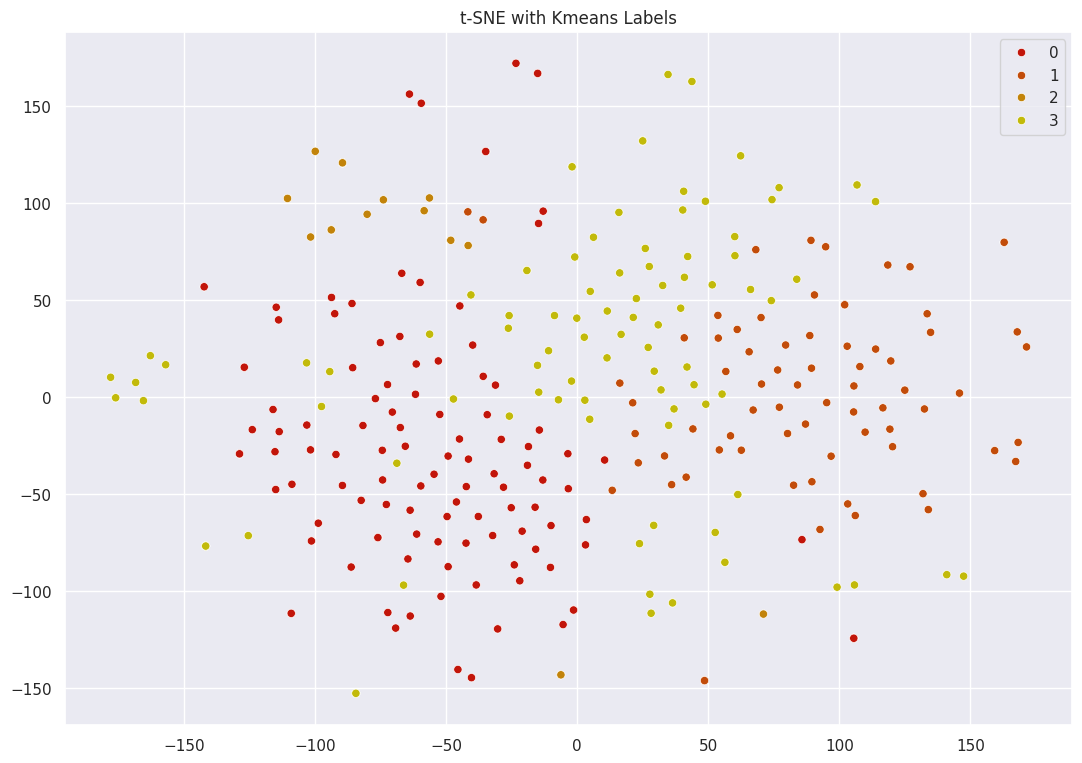

In [72]:
# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1],hue=cluster_labels, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

In [73]:
from scipy import spatial


cosine_similarity = lambda vec1,vec2:1-spatial.distance.cosine(vec1,vec2)

In [84]:
cosine_similarity(X_reduced[0],X_reduced[3])

0.16038521949483409

In [90]:
from sklearn.decomposition import LatentDirichletAllocation

In [92]:
LDA = LatentDirichletAllocation(n_components=4,random_state=42)

In [93]:
LDA.fit(transformed_data)

LatentDirichletAllocation(n_components=4, random_state=42)

In [89]:
transformed_data.shape

(337, 959)

In [88]:
len(tfidf.get_feature_names_out())

959

In [96]:
LDA.components_.shape

(4, 959)

In [103]:
for index,topic in enumerate(LDA.components_):
  print(f'The top 25 words for topic #{index}')
  print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
  print('\n')
  print('\n')

The top 25 words for topic #0
['human', 'layer', 'time', 'make', 'like', 'ai', 'learning', 'neural', 'learn', 'machine', 'image', 'model', 'datum', 'network', 'use']




The top 25 words for topic #1
['14', 'natural', 'pair', 'sum', 'sharing', '40', 'microsoft', 'facebook', 'github', 'contribution', 'cluster', 'plus', 'com', 'topic', 'vs']




The top 25 words for topic #2
['14', 'natural', 'pair', 'sum', 'sharing', '40', 'microsoft', 'facebook', 'github', 'contribution', 'cluster', 'plus', 'com', 'topic', 'vs']




The top 25 words for topic #3
['14', 'natural', 'pair', 'sum', 'sharing', '40', 'microsoft', 'facebook', 'github', 'contribution', 'cluster', 'plus', 'com', 'topic', 'vs']






In [104]:
top_results = LDA.transform(transformed_data)

In [106]:
top_results.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,